In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# plt.rcParams['figure.figsize'] = [8.0, 8.0]
%config InlineBackend.figure_formats = ['retina']
plt.rcParams['figure.dpi'] = 140
plt.rcParams['savefig.dpi'] = 300

In [2]:
# Display settings: 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
# pd.set_option('display.max_column', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_seq_items', None)
# pd.set_option('display.max_colwidth', 500)
# pd.set_option('expand_frame_repr', True)

# Update the default parameters for Matplotlib plots to specify various aspects of the plot's appearance,
# including the figure size, colors, gridlines, fonts, and more
plt.rcParams.update({
    # Overall Figure Aesthetics
    'figure.figsize': (8, 5),
    'figure.facecolor': 'white',

    # Axes and Grid
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.linewidth': 0.8,
    'axes.grid': True,
    'axes.grid.axis': 'y',
    'axes.grid.which': 'major',
    'grid.color': 'lightgray',
    'grid.linestyle': '-',
    'grid.linewidth': 0.5,

    # Spines (Borders)
    'axes.spines.top': False,
    'axes.spines.right': False,
    # Ticks and Tick Labels
    'xtick.bottom': True,
    'xtick.major.size': 3,
    'xtick.minor.size': 0,
    'ytick.left': True,
    'ytick.major.size': 3,
    'ytick.minor.size': 0,

    # Fonts and Text
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica', 'Arial', 'DejaVu Sans', 'Lucida Grande', 'Verdana'],
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,

    # Lines and Markers
    'lines.linewidth': 1.5,
    'lines.markersize': 5,

    # Colors
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'axes.titlecolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
})


In [3]:
# Standard Library
import itertools
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

# Numerical Analysis
import numpy as np
import pandas as pd

# Plotting
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statsmodels
from statsmodels.api import tsa
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning


In [4]:
# scikit-learn
from sklearn.model_selection import ParameterGrid, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prophet
from itertools import product
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_plotly, plot_components_plotly

# XGboost
import xgboost as xgb
from xgboost import plot_importance, plot_tree


# Utils
# from ts_utils import load_and_clean_air_traffic, \
#     lag_plots, \
#     decompose_series, \
#     perform_adf_test, \
#     perform_kpss_test   


plt.rcParams["figure.figsize"] = (9,6)

# Data Loading and Cleaning

In [6]:
df = pd.read_csv("../data/pd_raw_count_cleaned.csv")
df.head()

count_point_id direction_of_travel  year  count_date  hour  region_id  \
0              51                   N  2004  2004-05-21     7          1   
1              51                   N  2004  2004-05-21     8          1   
2              51                   N  2004  2004-05-21     9          1   
3              51                   N  2004  2004-05-21    10          1   
4              51                   N  2004  2004-05-21    11          1   

  region_name region_ons_code  local_authority_id local_authority_name  ...  \
0  South West       E12000009                   1      Isles of Scilly  ...   
1  South West       E12000009                   1      Isles of Scilly  ...   
2  South West       E12000009                   1      Isles of Scilly  ...   
3  South West       E12000009                   1      Isles of Scilly  ...   
4  South West       E12000009                   1      Isles of Scilly  ...   

  HGVs_3_rigid_axle HGVs_4_or_more_rigid_axle HGVs_3_or_4_articulated_axle  \
0               0.0                       0.0                          0.0   
1               7.0                       0.0                          0.0   
2               0.0                       0.0                          0.0   
3               0.0                       0.0                          0.0   
4               0.0                       0.0                          0.0   

  HGVs_5_articulated_axle  HGVs_6_articulated_axle  all_HGVs  \
0                       0                      0.0       0.0   
1                       0                      0.0      14.0   
2                       0                      0.0       5.0   
3                       0                      0.0       4.0   
4                       0                      0.0       6.0   

   all_motor_vehicles  Month  Day_of_Week  Day  
0                19.0      5       Friday   21  
1                44.0      5       Friday   21  
2                45.0      5       Friday   21  
3                41.0      5       Friday   21  
4                41.0      5       Friday   21  

[5 rows x 34 columns]

In [7]:
df.shape

(4960860, 34)

In [8]:
east_england_data = pd.read_csv('../data/east_of_england_data.csv', index_col=0)


In [9]:
east_england_data.head()

direction_of_travel  year  count_date  hour  region_id  \
count_point_id                                                          
6003                             N  2000  2000-03-31     7          7   
6003                             N  2000  2000-03-31     8          7   
6003                             N  2000  2000-03-31     9          7   
6003                             N  2000  2000-03-31    10          7   
6003                             N  2000  2000-03-31    11          7   

                    region_name region_ons_code  local_authority_id  \
count_point_id                                                        
6003            East of England       E12000006                 208   
6003            East of England       E12000006                 208   
6003            East of England       E12000006                 208   
6003            East of England       E12000006                 208   
6003            East of England       E12000006                 208   

               local_authority_name local_authority_code  ...  \
count_point_id                                            ...   
6003                   Bedfordshire            E10000001  ...   
6003                   Bedfordshire            E10000001  ...   
6003                   Bedfordshire            E10000001  ...   
6003                   Bedfordshire            E10000001  ...   
6003                   Bedfordshire            E10000001  ...   

               HGVs_3_rigid_axle HGVs_4_or_more_rigid_axle  \
count_point_id                                               
6003                        40.0                      36.0   
6003                        17.0                      11.0   
6003                        24.0                      17.0   
6003                        26.0                      22.0   
6003                        24.0                      17.0   

               HGVs_3_or_4_articulated_axle  HGVs_5_articulated_axle  \
count_point_id                                                         
6003                                   63.0                      223   
6003                                   60.0                      180   
6003                                   85.0                      212   
6003                                   80.0                      262   
6003                                   77.0                      218   

                HGVs_6_articulated_axle  all_HGVs  all_motor_vehicles  Month  \
count_point_id                                                                 
6003                              145.0     678.0              4006.0      3   
6003                              119.0     590.0              4142.0      3   
6003                              117.0     681.0              3325.0      3   
6003                              157.0     749.0              3500.0      3   
6003                              172.0     728.0              3693.0      3   

                Day_of_Week  Day  
count_point_id                    
6003                 Friday   31  
6003                 Friday   31  
6003                 Friday   31  
6003                 Friday   31  
6003                 Friday   31  

[5 rows x 33 columns]

In [10]:
print(f"{east_england_data.shape} rows in east of england dataset")

(550056, 33) rows in east of england dataset


In [11]:
print(east_england_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550056 entries, 6003 to 999996
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   direction_of_travel           550056 non-null  object 
 1   year                          550056 non-null  int64  
 2   count_date                    550056 non-null  object 
 3   hour                          550056 non-null  int64  
 4   region_id                     550056 non-null  int64  
 5   region_name                   550056 non-null  object 
 6   region_ons_code               550056 non-null  object 
 7   local_authority_id            550056 non-null  int64  
 8   local_authority_name          550056 non-null  object 
 9   local_authority_code          550056 non-null  object 
 10  road_name                     550056 non-null  object 
 11  road_category                 550056 non-null  object 
 12  road_type                     550056 non-

In [12]:
east_england_data.columns

Index(['direction_of_travel', 'year', 'count_date', 'hour', 'region_id',
       'region_name', 'region_ons_code', 'local_authority_id',
       'local_authority_name', 'local_authority_code', 'road_name',
       'road_category', 'road_type', 'easting', 'northing', 'latitude',
       'longitude', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'LGVs', 'HGVs_2_rigid_axle',
       'HGVs_3_rigid_axle', 'HGVs_4_or_more_rigid_axle',
       'HGVs_3_or_4_articulated_axle', 'HGVs_5_articulated_axle',
       'HGVs_6_articulated_axle', 'all_HGVs', 'all_motor_vehicles', 'Month',
       'Day_of_Week', 'Day'],
      dtype='object')

# Data Preprocessing

In [61]:
# Convert 'count_date' to datetime
east_england_data['count_date'] = pd.to_datetime(east_england_data['count_date'])

# Check new data types 
print(east_england_data.dtypes)

direction_of_travel                     object
year                                     int64
count_date                      datetime64[ns]
hour                                     int64
region_id                                int64
region_name                             object
region_ons_code                         object
local_authority_id                       int64
local_authority_name                    object
local_authority_code                    object
road_name                               object
road_category                           object
road_type                               object
easting                                  int64
northing                                 int64
latitude                               float64
longitude                              float64
pedal_cycles                             int64
two_wheeled_motor_vehicles               int64
cars_and_taxis                         float64
buses_and_coaches                      float64
LGVs         

In [63]:
# Drop unnecessary columns from the data
columns_to_drop = [
    'year', 'region_id', 'region_name', 'region_ons_code', 'local_authority_id', 
    'local_authority_code', 'road_name', 'road_category', 'easting', 'northing', 
    'latitude', 'longitude', 'pedal_cycles', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle', 
    'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle', 'HGVs_5_articulated_axle', 
    'HGVs_6_articulated_axle', 'Month', 'Day_of_Week', 'Day', 'Day_of_Week', 'all_HGVs', 'buses_and_coaches', 'cars_and_taxis', 'two_wheeled_motor_vehicles',
    'LGVs'
]
east_england_data = east_england_data.drop(columns=columns_to_drop)

In [65]:
east_england_data.head()

direction_of_travel count_date  hour local_authority_name  \
count_point_id                                                             
6003                             N 2000-03-31     7         Bedfordshire   
6003                             N 2000-03-31     8         Bedfordshire   
6003                             N 2000-03-31     9         Bedfordshire   
6003                             N 2000-03-31    10         Bedfordshire   
6003                             N 2000-03-31    11         Bedfordshire   

               road_type  all_motor_vehicles  
count_point_id                                
6003               Major              4006.0  
6003               Major              4142.0  
6003               Major              3325.0  
6003               Major              3500.0  
6003               Major              3693.0

In [67]:
east_england_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550056 entries, 6003 to 999996
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   direction_of_travel   550056 non-null  object        
 1   count_date            550056 non-null  datetime64[ns]
 2   hour                  550056 non-null  int64         
 3   local_authority_name  550056 non-null  object        
 4   road_type             550056 non-null  object        
 5   all_motor_vehicles    550054 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 29.4+ MB


## Check Missing Data

In [69]:
east_england_data.isnull().sum()

direction_of_travel     0
count_date              0
hour                    0
local_authority_name    0
road_type               0
all_motor_vehicles      2
dtype: int64

In [71]:
east_england_data.dropna(inplace=True)

In [73]:
east_england_data.isnull().sum()

direction_of_travel     0
count_date              0
hour                    0
local_authority_name    0
road_type               0
all_motor_vehicles      0
dtype: int64

In [75]:
print(f" The shape of the cleaned data is {east_england_data.shape}")

 The shape of the cleaned data is (550054, 6)


### Hourly Grouping Aggregated Data

In [77]:
east_england_data['count_date'].head(10)

count_point_id
6003   2000-03-31
6003   2000-03-31
6003   2000-03-31
6003   2000-03-31
6003   2000-03-31
6003   2000-03-31
6003   2000-03-31
6003   2000-03-31
6003   2000-03-31
6003   2000-03-31
Name: count_date, dtype: datetime64[ns]

In [79]:
# Convert 'count_date' to datetime 
east_england_data['count_date'] = pd.to_datetime(east_england_data['count_date']).dt.date

# # Combine 'count_date' and 'hour' to create a DateTime 'timestamp'
# east_england_data['timestamp'] = pd.to_datetime(east_england_data['count_date'].astype(str) + ' ' + east_england_data['hour'].astype(str).str.zfill(2) + ':00')

In [81]:
east_england_data['count_date'].head()

count_point_id
6003    2000-03-31
6003    2000-03-31
6003    2000-03-31
6003    2000-03-31
6003    2000-03-31
Name: count_date, dtype: object

In [83]:
# Create a 'timestamp' column by combining 'count_date' and 'hour'
east_england_data['timestamp'] = pd.to_datetime(east_england_data['count_date']) + pd.to_timedelta(east_england_data['hour'], unit='h')

In [85]:
print(east_england_data[['timestamp', 'count_date', 'hour']].head(20))

                         timestamp  count_date  hour
count_point_id                                      
6003           2000-03-31 07:00:00  2000-03-31     7
6003           2000-03-31 08:00:00  2000-03-31     8
6003           2000-03-31 09:00:00  2000-03-31     9
6003           2000-03-31 10:00:00  2000-03-31    10
6003           2000-03-31 11:00:00  2000-03-31    11
6003           2000-03-31 12:00:00  2000-03-31    12
6003           2000-03-31 13:00:00  2000-03-31    13
6003           2000-03-31 14:00:00  2000-03-31    14
6003           2000-03-31 15:00:00  2000-03-31    15
6003           2000-03-31 16:00:00  2000-03-31    16
6003           2000-03-31 17:00:00  2000-03-31    17
6003           2000-03-31 18:00:00  2000-03-31    18
6003           2000-03-31 07:00:00  2000-03-31     7
6003           2000-03-31 08:00:00  2000-03-31     8
6003           2000-03-31 09:00:00  2000-03-31     9
6003           2000-03-31 10:00:00  2000-03-31    10
6003           2000-03-31 11:00:00  2000-03-31

In [87]:
east_england_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550054 entries, 6003 to 999996
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   direction_of_travel   550054 non-null  object        
 1   count_date            550054 non-null  object        
 2   hour                  550054 non-null  int64         
 3   local_authority_name  550054 non-null  object        
 4   road_type             550054 non-null  object        
 5   all_motor_vehicles    550054 non-null  float64       
 6   timestamp             550054 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 33.6+ MB


In [93]:
# # Create a 'timestamp' column by combining 'count_date' and 'hour'
east_england_data['timestamp'] = pd.to_datetime(east_england_data['count_date']) + pd.to_timedelta(east_england_data['hour'], unit='h')

In [95]:
east_england_data.head()

direction_of_travel  count_date  hour local_authority_name  \
count_point_id                                                              
6003                             N  2000-03-31     7         Bedfordshire   
6003                             N  2000-03-31     8         Bedfordshire   
6003                             N  2000-03-31     9         Bedfordshire   
6003                             N  2000-03-31    10         Bedfordshire   
6003                             N  2000-03-31    11         Bedfordshire   

               road_type  all_motor_vehicles           timestamp  
count_point_id                                                    
6003               Major              4006.0 2000-03-31 07:00:00  
6003               Major              4142.0 2000-03-31 08:00:00  
6003               Major              3325.0 2000-03-31 09:00:00  
6003               Major              3500.0 2000-03-31 10:00:00  
6003               Major              3693.0 2000-03-31 11:00:00

In [103]:
# Create a 'timestamp' column by combining 'count_date' and 'hour'
east_england_data['timestamp'] = pd.to_datetime(east_england_data['count_date']) + pd.to_timedelta(east_england_data['hour'], unit='h')
east_england_data[['timestamp', 'count_date', 'hour']].head()

timestamp  count_date  hour
count_point_id                                      
6003           2000-03-31 07:00:00  2000-03-31     7
6003           2000-03-31 08:00:00  2000-03-31     8
6003           2000-03-31 09:00:00  2000-03-31     9
6003           2000-03-31 10:00:00  2000-03-31    10
6003           2000-03-31 11:00:00  2000-03-31    11

In [109]:

# group the new 'timestamp' 
hourly_grouped_data = east_england_data.groupby('timestamp').agg({"all_motor_vehicles": sum})
hourly_grouped_data.head()

all_motor_vehicles
timestamp                              
2000-03-17 07:00:00              8187.0
2000-03-17 08:00:00             10022.0
2000-03-17 09:00:00              7651.0
2000-03-17 10:00:00              7203.0
2000-03-17 11:00:00              7458.0

### Daily Aggregated Data

In [111]:
daily_grouped_data = hourly_grouped_data.resample('D').sum().sort_index(ascending=False)
daily_grouped_data.head(10)

all_motor_vehicles
timestamp                     
2023-11-03             68120.0
2023-11-02                 0.0
2023-11-01             24442.0
2023-10-31             63479.0
2023-10-30                 0.0
2023-10-29                 0.0
2023-10-28                 0.0
2023-10-27                 0.0
2023-10-26                 0.0
2023-10-25                 0.0

In [113]:
hourly_grouped_data['all_motor_vehicles']

timestamp
2000-03-17 07:00:00     8187.0
2000-03-17 08:00:00    10022.0
2000-03-17 09:00:00     7651.0
2000-03-17 10:00:00     7203.0
2000-03-17 11:00:00     7458.0
                        ...   
2023-11-03 14:00:00     6094.0
2023-11-03 15:00:00     6416.0
2023-11-03 16:00:00     6969.0
2023-11-03 17:00:00     6623.0
2023-11-03 18:00:00     4912.0
Name: all_motor_vehicles, Length: 29053, dtype: float64

In [115]:
daily_grouped_data.index

DatetimeIndex(['2023-11-03', '2023-11-02', '2023-11-01', '2023-10-31',
               '2023-10-30', '2023-10-29', '2023-10-28', '2023-10-27',
               '2023-10-26', '2023-10-25',
               ...
               '2000-03-26', '2000-03-25', '2000-03-24', '2000-03-23',
               '2000-03-22', '2000-03-21', '2000-03-20', '2000-03-19',
               '2000-03-18', '2000-03-17'],
              dtype='datetime64[ns]', name='timestamp', length=8632, freq='-1D')

In [117]:
daily_grouped_data.columns

Index(['all_motor_vehicles'], dtype='object')

<Axes: xlabel='timestamp'>

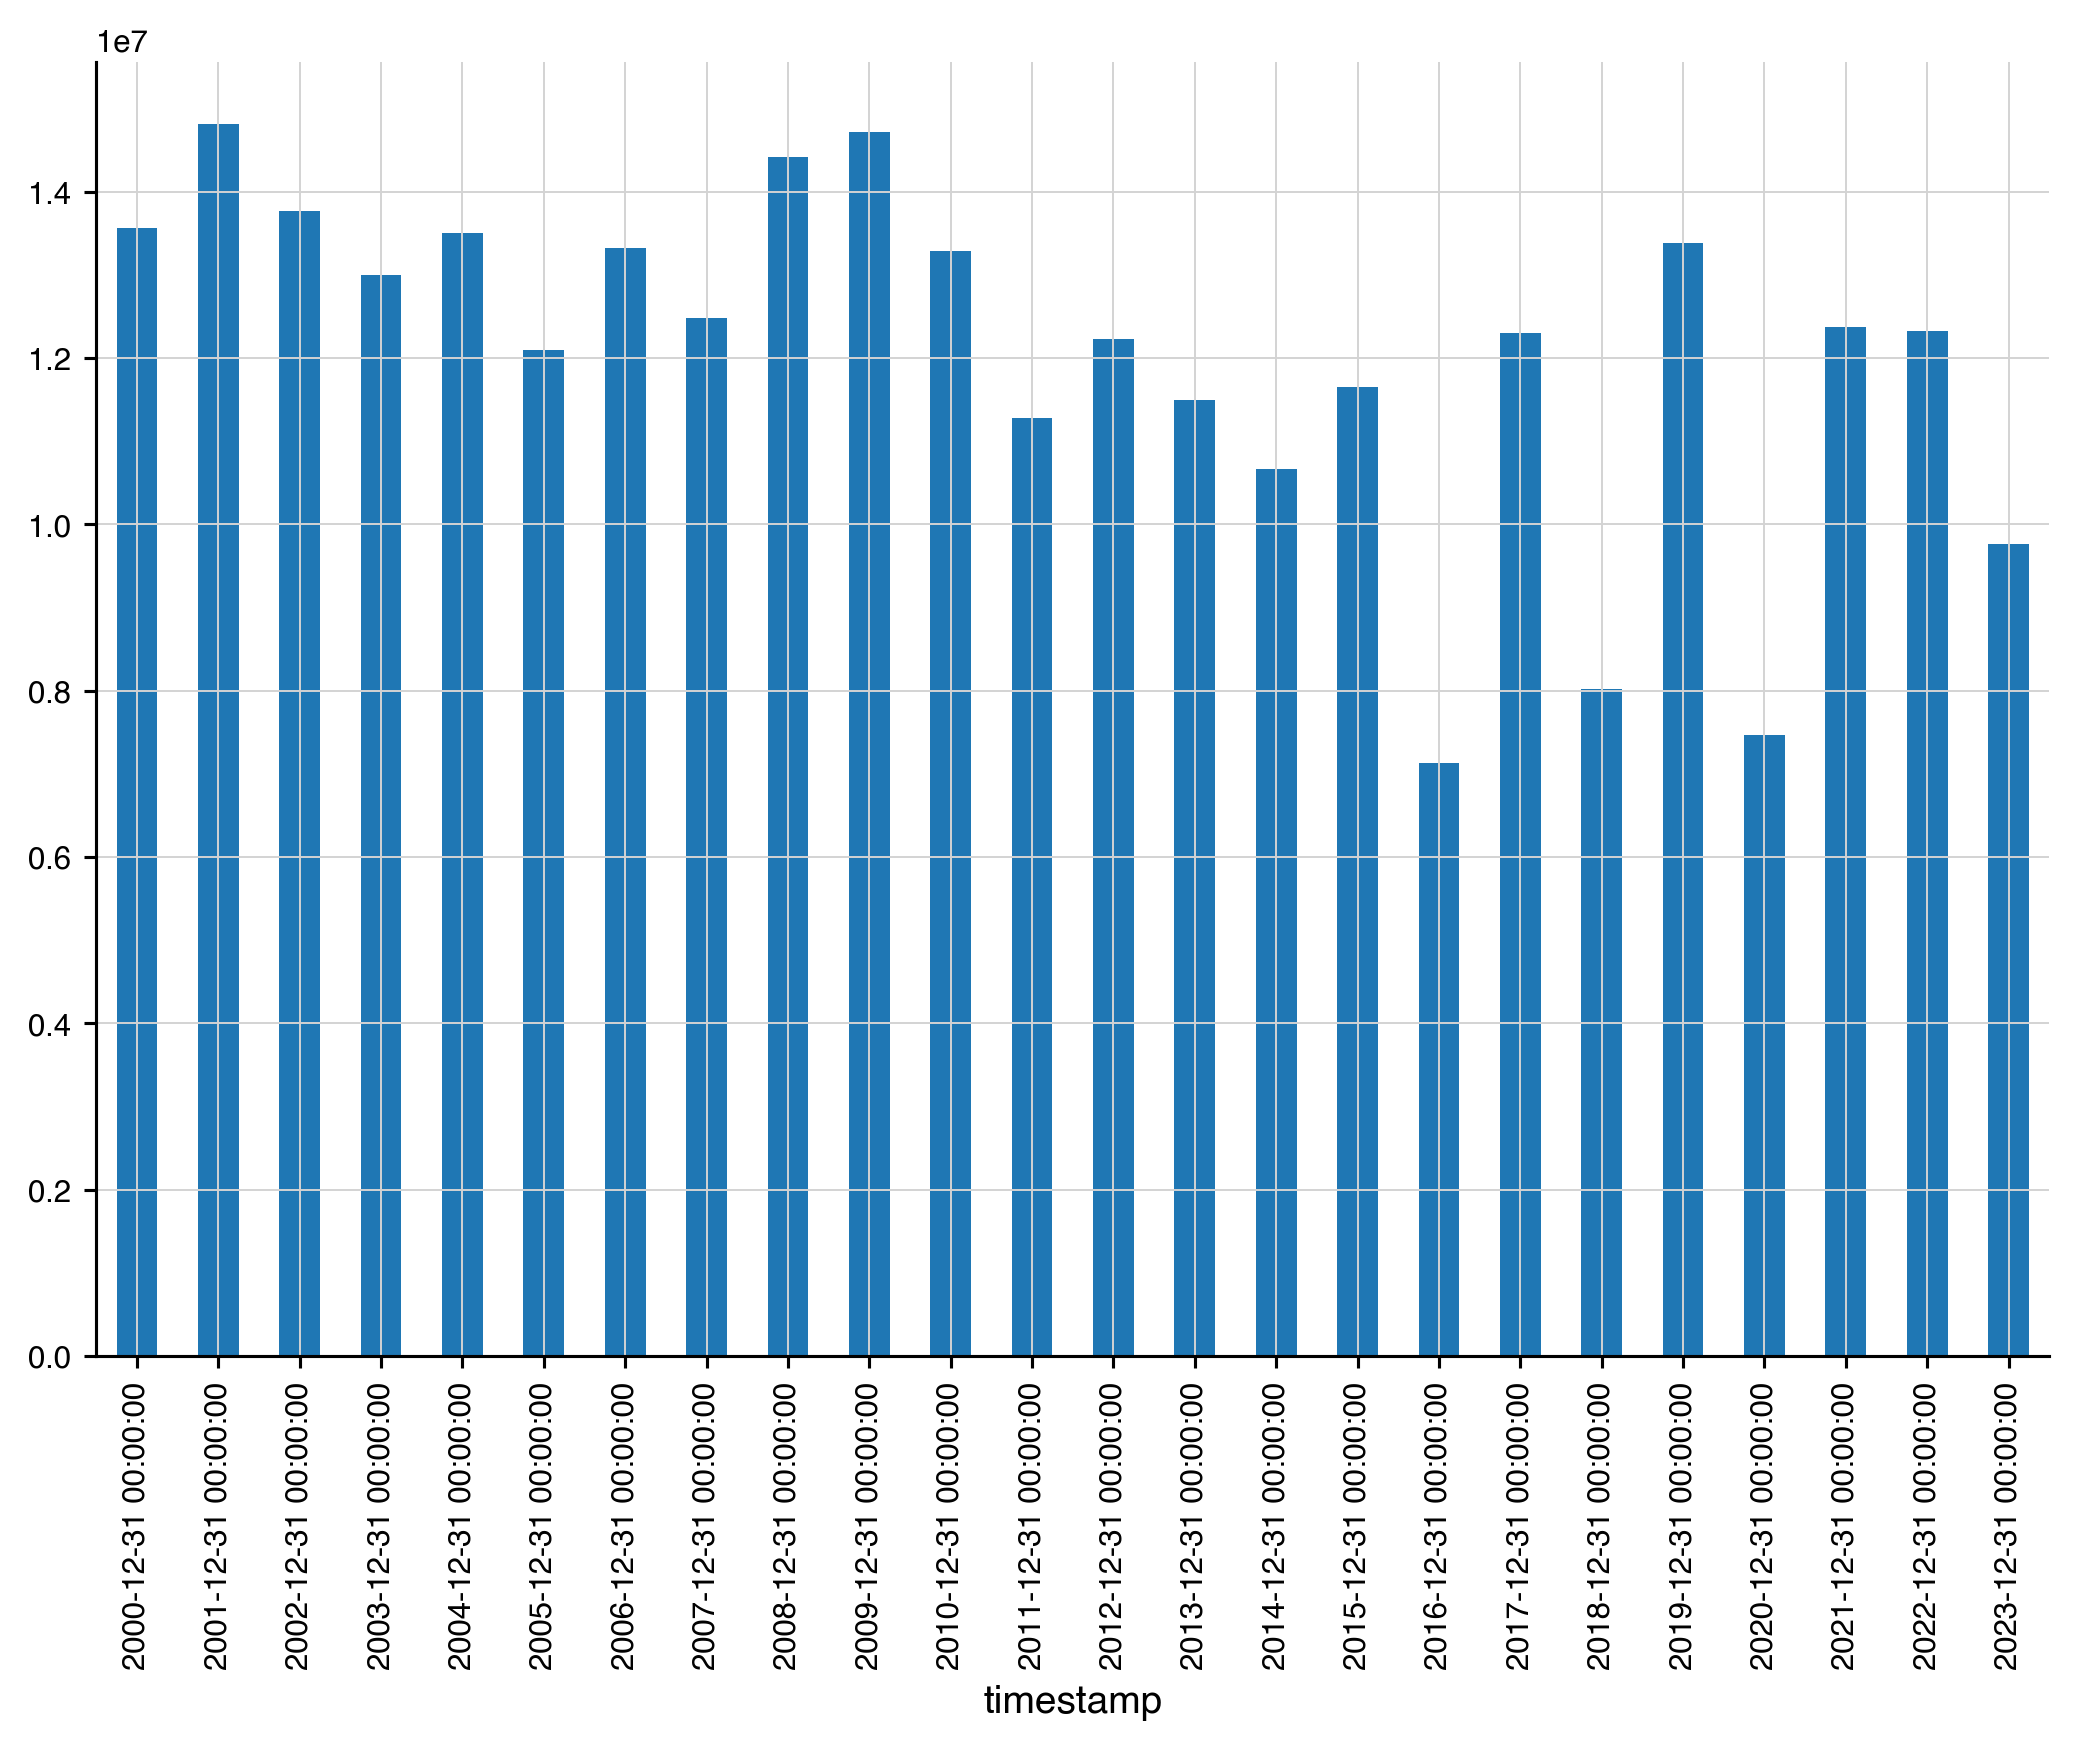

In [121]:
daily_grouped_data.resample('y').sum()['all_motor_vehicles'].plot(kind='bar')

### Monthly Aggregated Data

In [123]:
monthly_data = hourly_grouped_data.resample('MS').sum()
monthly_data.sample(15)

all_motor_vehicles
timestamp                     
2021-03-01             28464.0
2005-04-01           1767350.0
2014-09-01           1595349.0
2001-06-01           3542113.0
2002-09-01           1486684.0
2021-07-01           1495969.0
2013-07-01           1513610.0
2004-05-01           2585639.0
2021-02-01                 0.0
2009-10-01           1982543.0
2017-09-01           3168046.0
2010-04-01            884747.0
2006-06-01           2387789.0
2022-10-01           1039303.0
2005-11-01             43364.0

# EDA - Missing Value Analysis

In [125]:
monthly_data.head()

all_motor_vehicles
timestamp                     
2000-03-01           1603322.0
2000-04-01           1475538.0
2000-05-01           2848495.0
2000-06-01           2814927.0
2000-07-01           1646437.0

In [149]:
monthly_data_zeros = monthly_data.loc[monthly_data["all_motor_vehicles"] == 0]
monthly_data_zeros.head()

all_motor_vehicles
timestamp                     
2000-08-01                 0.0
2000-11-01                 0.0
2000-12-01                 0.0
2001-01-01                 0.0
2001-02-01                 0.0

In [152]:
monthly_data_zeros.shape

(111, 1)

In [154]:
monthly_data_zeros.resample('y').count() # finding out the monthly missing value in each year

all_motor_vehicles
timestamp                     
2000-12-31                   3
2001-12-31                   5
2002-12-31                   5
2003-12-31                   5
2004-12-31                   5
2005-12-31                   4
2006-12-31                   5
2007-12-31                   5
2008-12-31                   5
2009-12-31                   5
2010-12-31                   5
2011-12-31                   4
2012-12-31                   5
2013-12-31                   5
2014-12-31                   6
2015-12-31                   4
2016-12-31                   4
2017-12-31                   5
2018-12-31                   4
2019-12-31                   5
2020-12-31                   5
2021-12-31                   5
2022-12-31                   4
2023-12-31                   3

# EDA - Traffic Trends Analysis

**Notes**
- The main objective of this Exploratory Data Analysis (EDA) for traffic trends is to gain a deeper understanding of the key characteristics and patterns within the traffic data. The goal is to identify any recurring patterns, trends, or seasonality in traffic.

In [156]:
def plot_rolling_mean_and_std(series: pd.Series, window: int) -> None:
    """
    This function plots the rolling mean and rolling standard deviation
    of a time series to help visually inspect stationarity.
    
    Args:
        series (pd.Series): Time series data (single column)
        window (int): Window size for rolling calculations (in time units)
        
    Returns: 
        None
    """
    # Get Rolling Mean and STD
    roll_mean = series.rolling(window=window).mean()
    roll_std = series.rolling(window=window).std()

    # Plot original series, rolling mean, and rolling standard deviation
    plt.figure(figsize=(12, 6))
    plt.plot(series, label='Original', color='blue', alpha=0.5)
    plt.plot(roll_mean, label=f'Rolling Mean (window={window})', color='red')
    plt.plot(roll_std, label=f'Rolling STD (window={window})', color='green')
    
    # Adding titles and labels
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

**- Using the Rolling Mean & Standard Deviation analyzes time series data using rolling statistics to assess mean and standard deviation stability over time.**

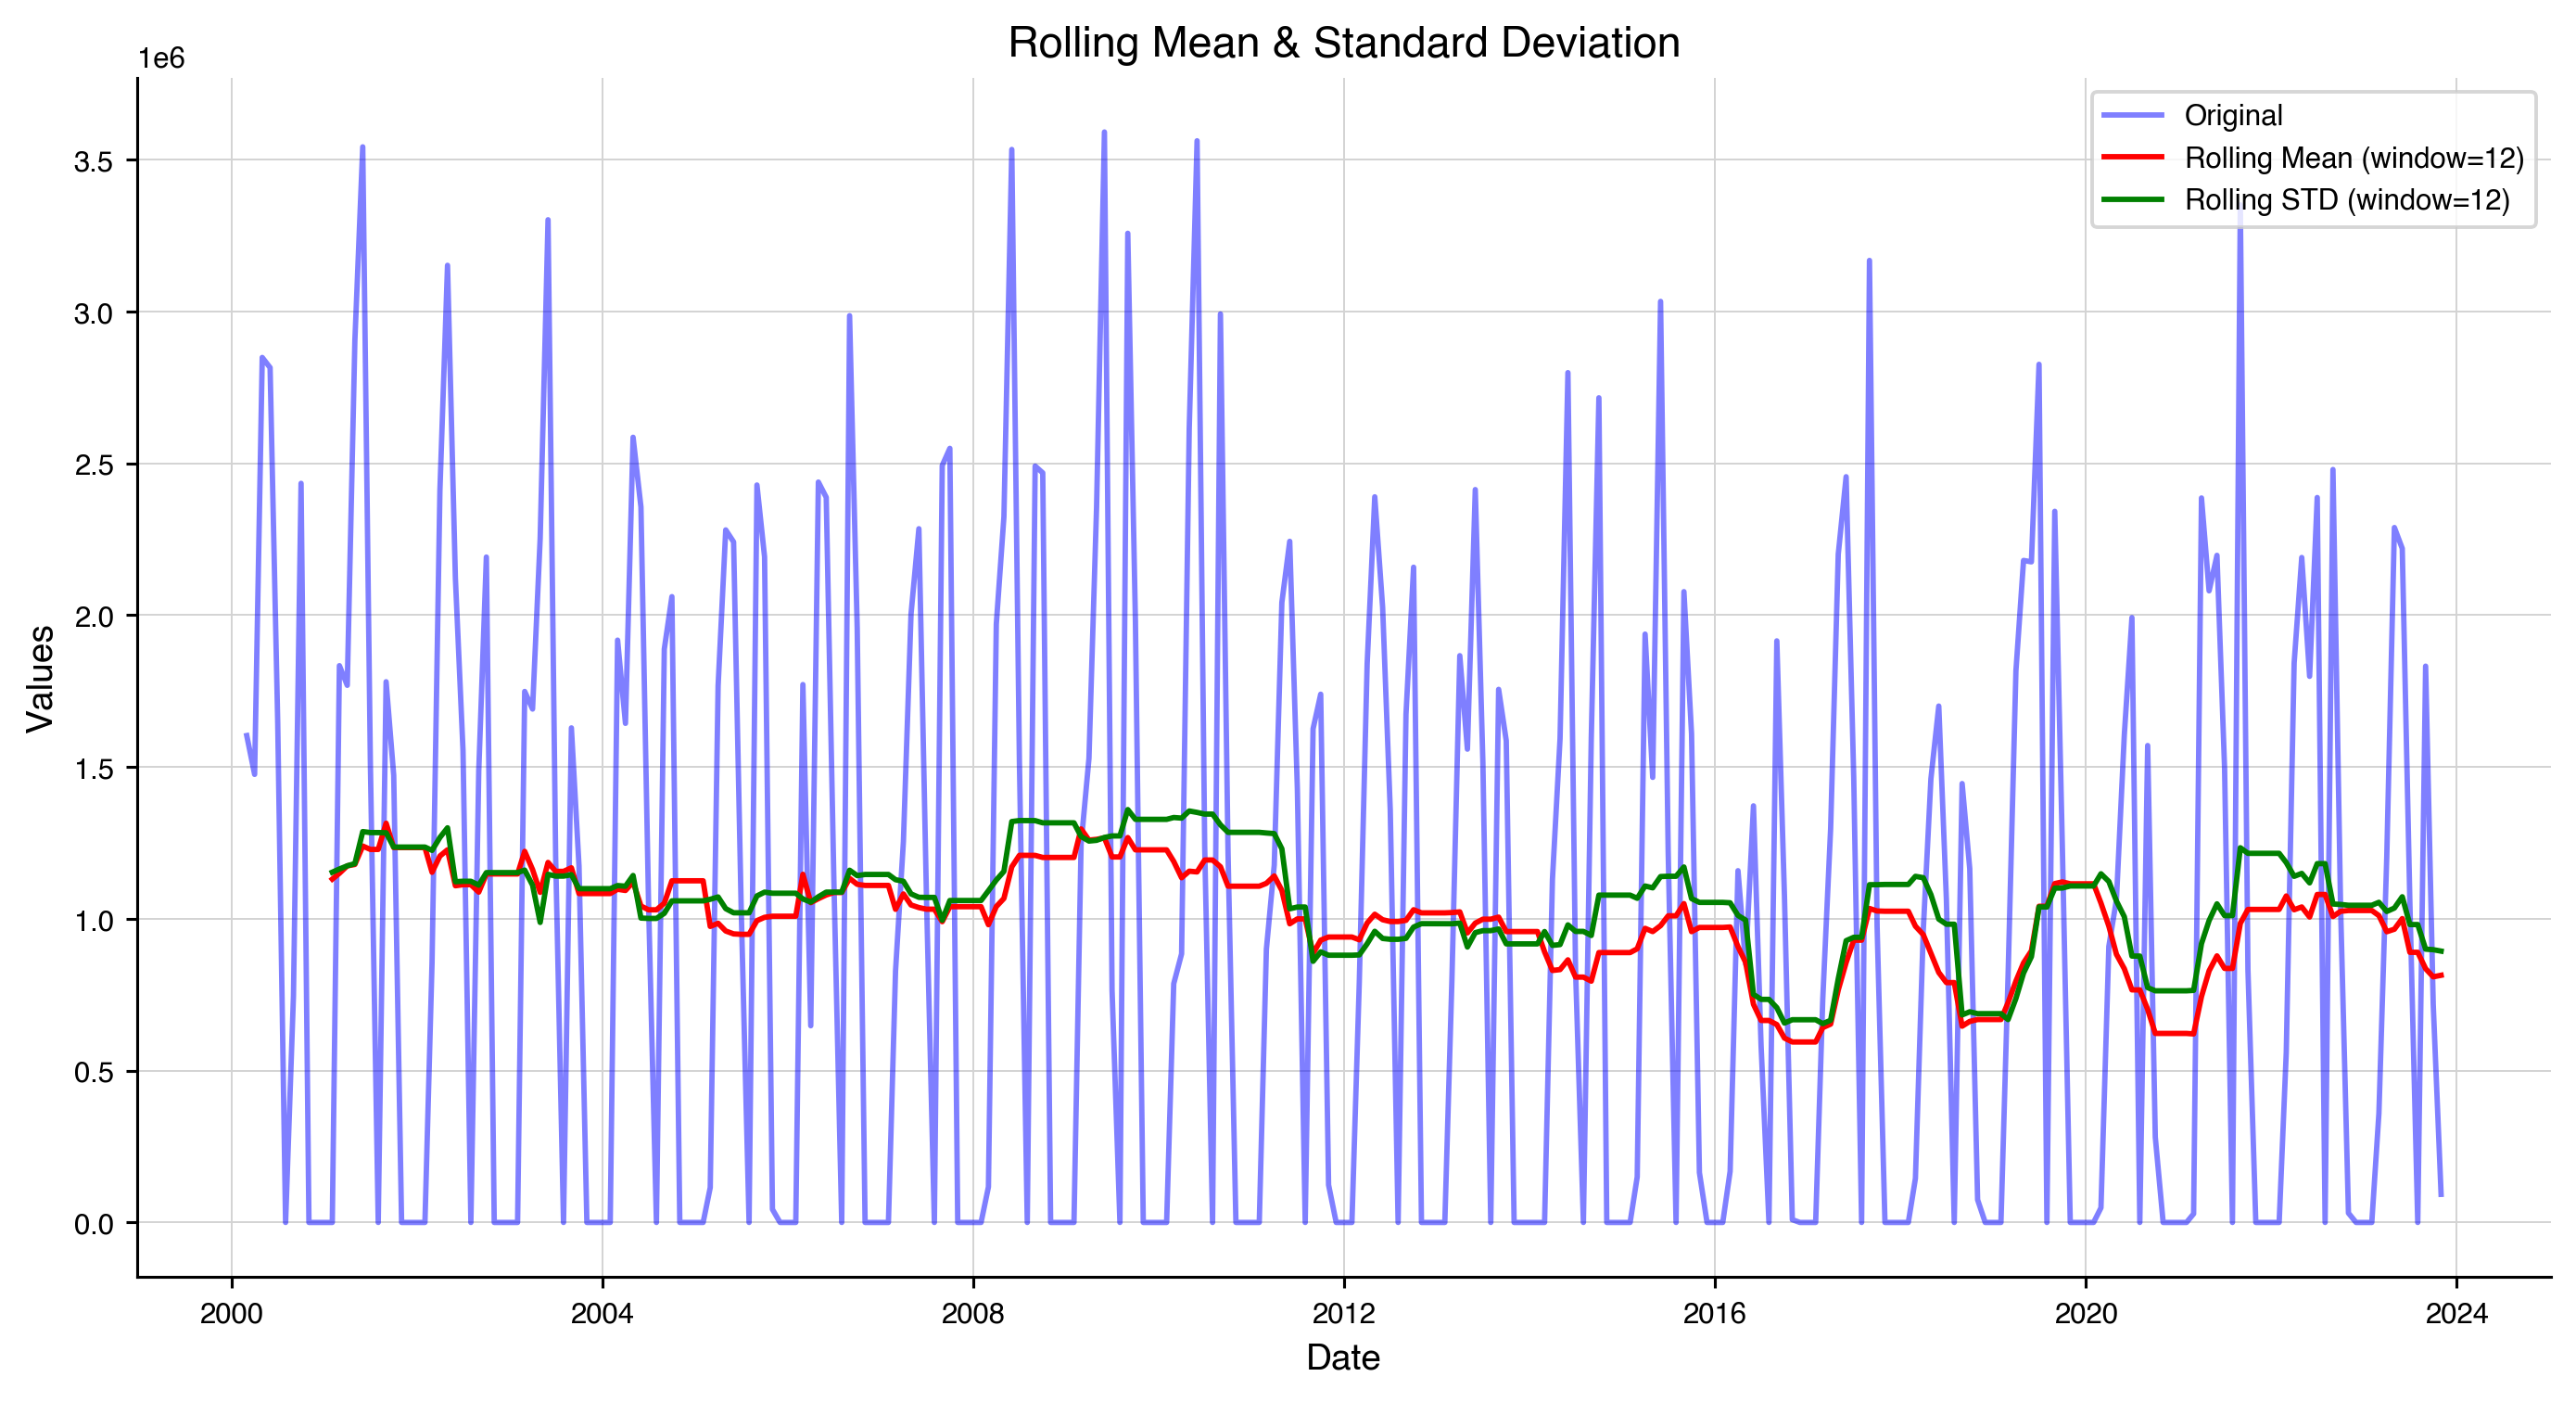

In [45]:

# Plot the rolling mean and standard deviation for a 12-month window 
plot_rolling_mean_and_std(monthly_data['all_motor_vehicles'], window=12) 

**Observations**
- **Trend Stability**: The rolling mean suggests that the underlying trend of the time series becomes relatively stable, especially from 2010 onwards.
- **Volatility**(fluctuation): There are periods of high volatility (as seen from the green line), but overall, the rolling standard deviation shows controlled volatility over time, with notable spikes during periods of significant fluctuation.
- **Seasonality**: The repeated spikes and declines in the original series may indicate some form of seasonality or cyclical behaviour, but further analysis is needed to confirm.

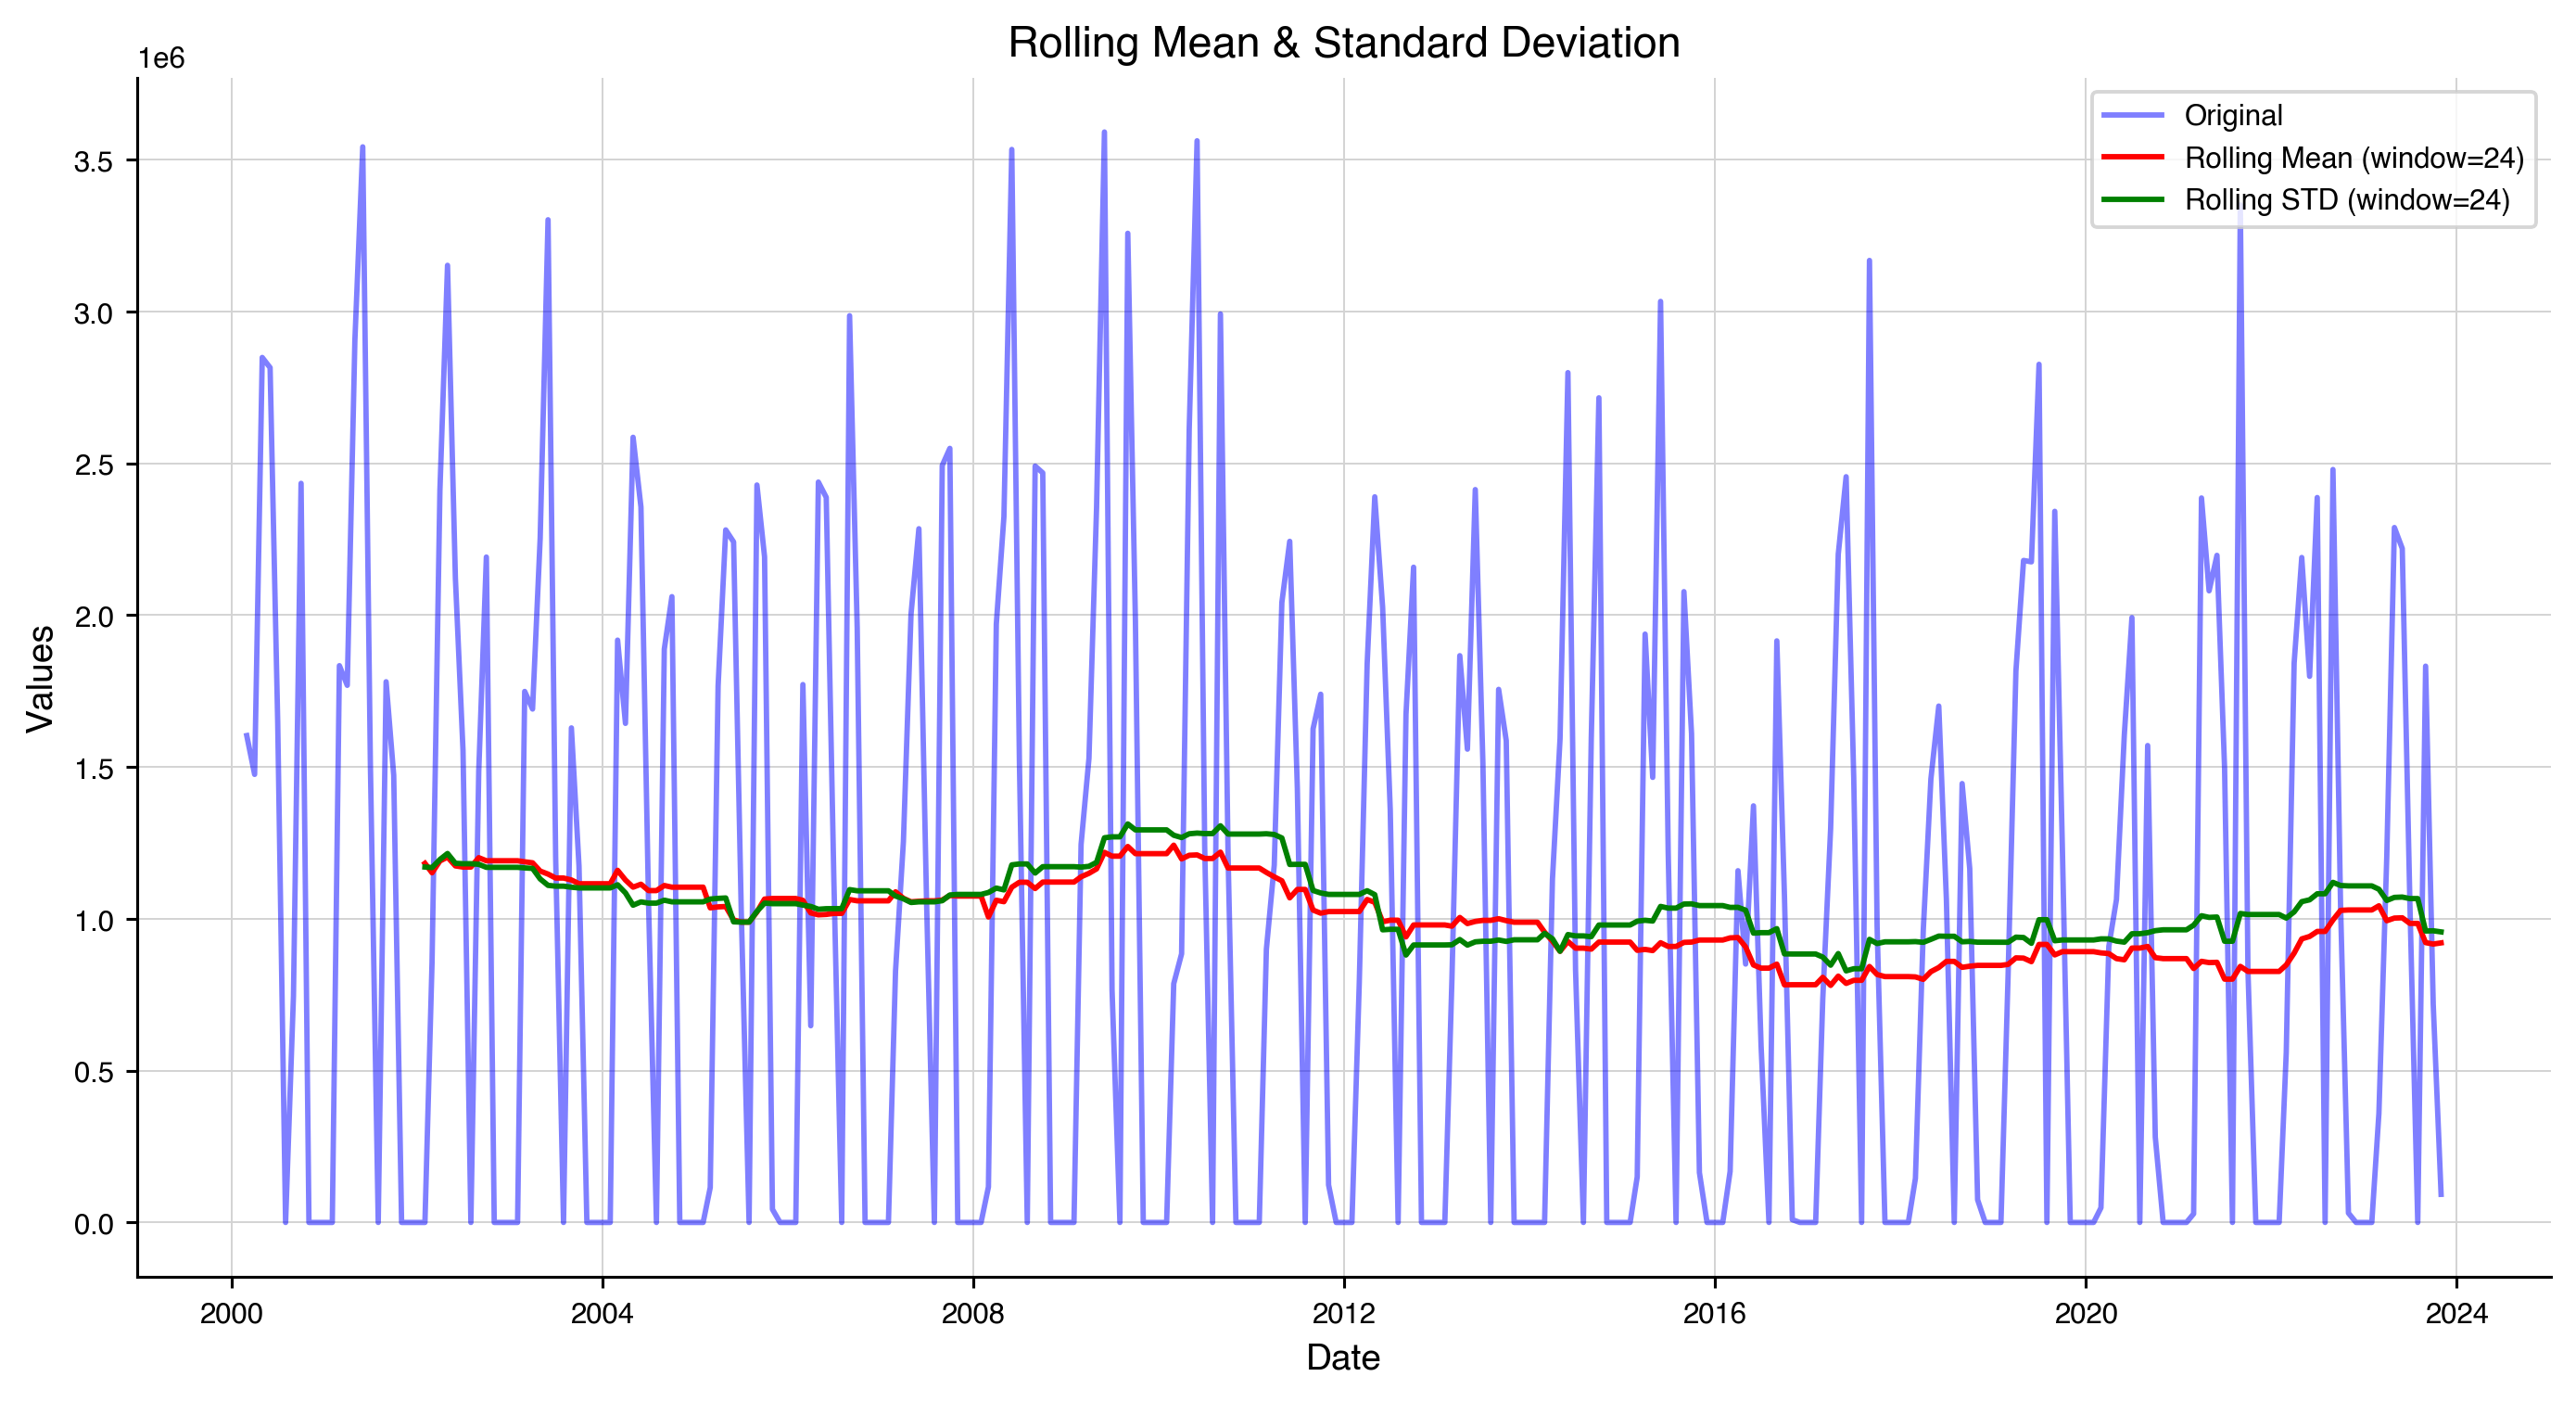

In [158]:
# Plot the rolling mean and standard deviation for a 24-month window 
plot_rolling_mean_and_std(monthly_data['all_motor_vehicles'], window=24)

In [160]:
from statsmodels.graphics.tsaplots import month_plot

In [162]:
monthly_data["all_motor_vehicles"].head()

timestamp
2000-03-01    1603322.0
2000-04-01    1475538.0
2000-05-01    2848495.0
2000-06-01    2814927.0
2000-07-01    1646437.0
Freq: MS, Name: all_motor_vehicles, dtype: float64

In [164]:
monthly_data.head()

all_motor_vehicles
timestamp                     
2000-03-01           1603322.0
2000-04-01           1475538.0
2000-05-01           2848495.0
2000-06-01           2814927.0
2000-07-01           1646437.0

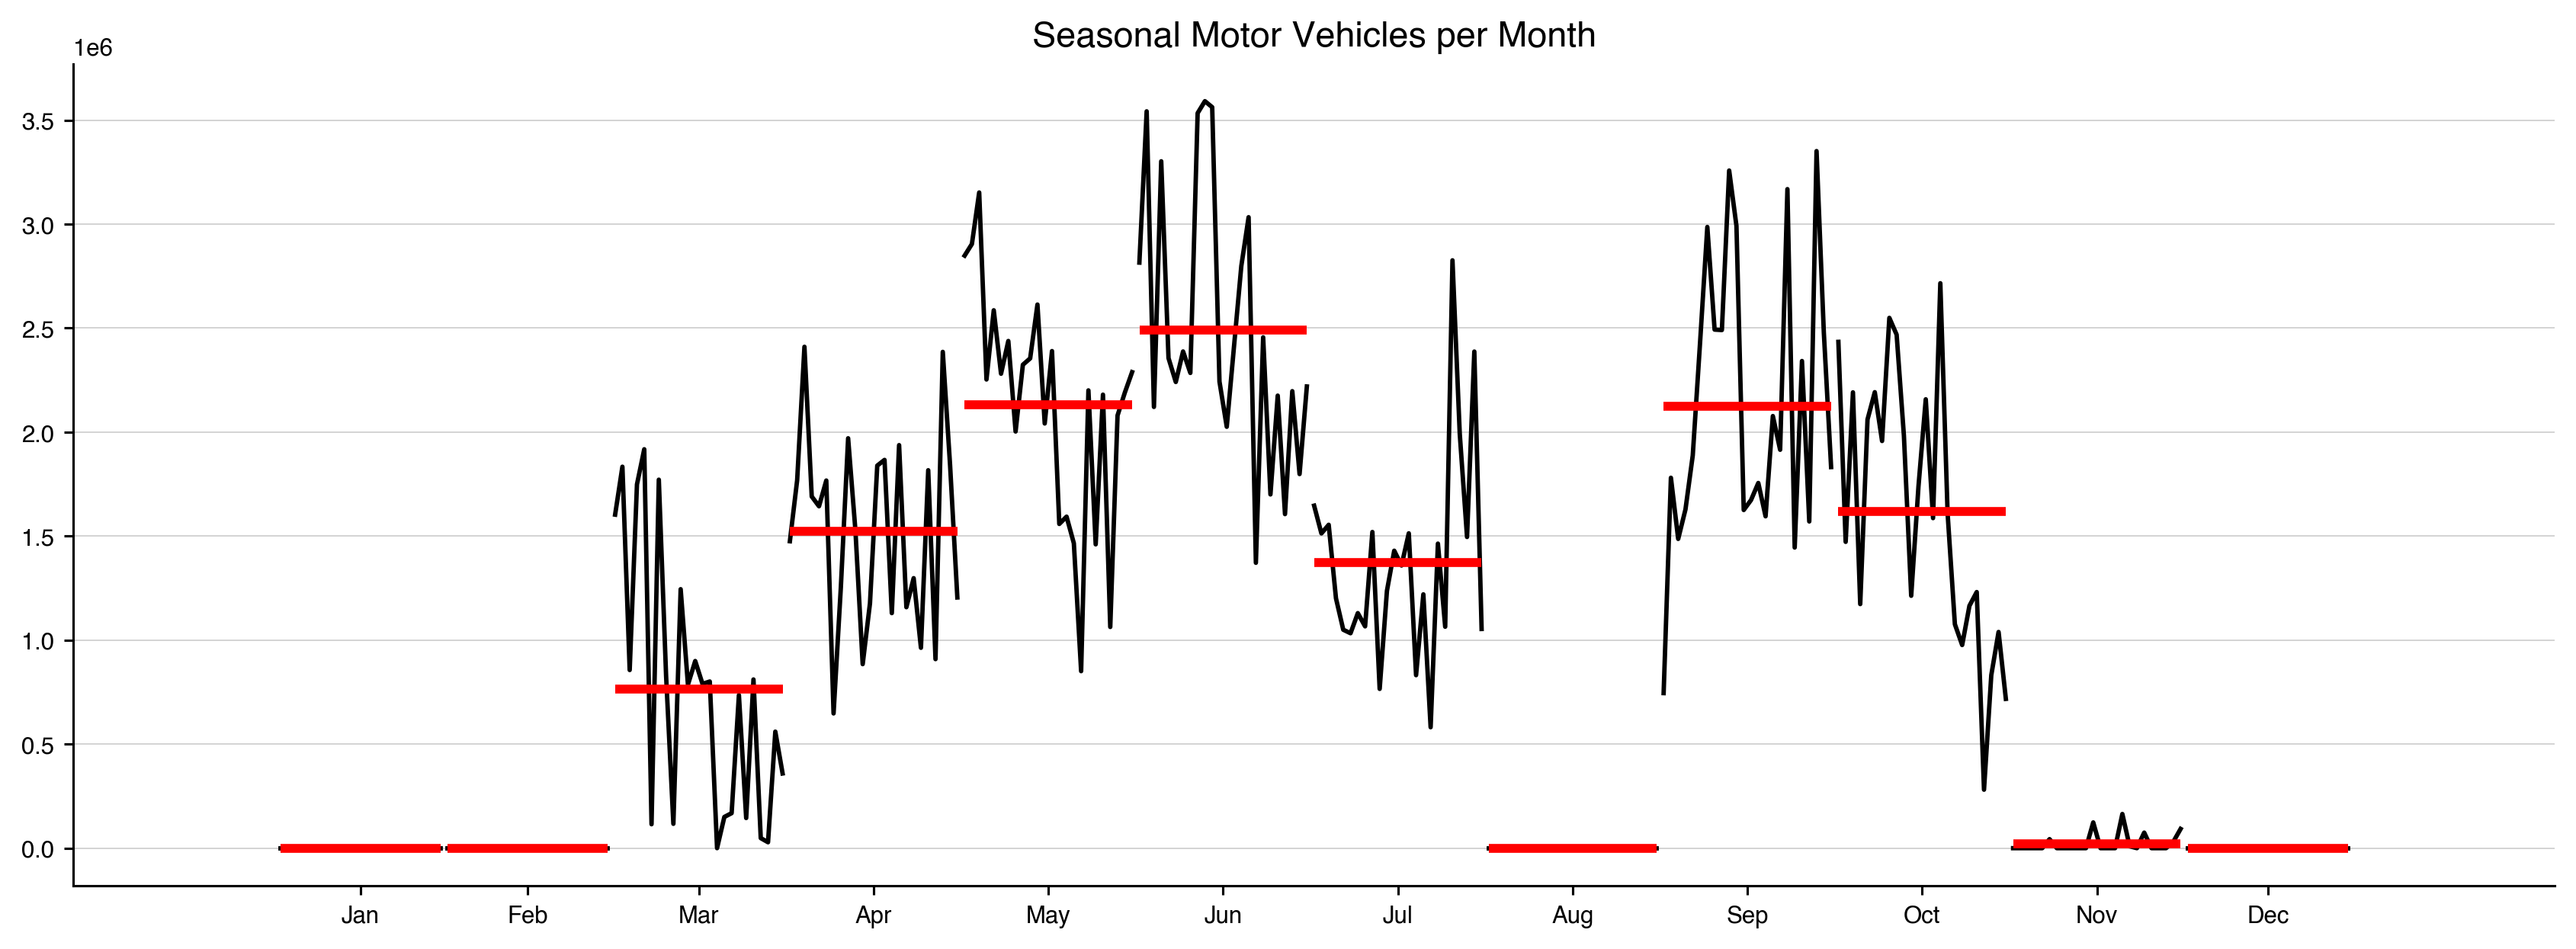

In [166]:
plt.figure(figsize=(15, 5))

# create the seasonal plot
month_plot(monthly_data["all_motor_vehicles"], ax=plt.gca())

plt.title("Seasonal Motor Vehicles per Month")
sns.despine()
plt.show()

**Key Observation**

- Seasonal Pattern:

The graph clearly indicates seasonality as vehicle activity fluctuates between months.
Activity is at its lowest or close to zero in the winter months of January, February, November, and December.
Vehicle activity increases sharply from March onward and peaks at various points during the spring, summer, and early fall months.

- Higher Activity in Warmer Months:

The highest activity is visible during spring and summer months, particularly from April to October. This could be due to increased travel or events happening during these periods.
June, July, and September seem to exhibit the highest peaks in motor vehicle activity, followed by a dip in August and another increase in October.

- Red Horizontal Lines:

These red lines seem to represent the average or median vehicle activity within each month, giving a sense of central tendency amidst the fluctuating data.
In months like April, May, and October, the red lines show higher averages compared to months like March or August, where activity seems to be lower on average.

- Low Activity Months:

November and December show very little motor vehicle activity, potentially due to colder weather, holidays, or reduced traffic during these months.
Similarly, January and February also show close to zero vehicle activity, reinforcing the idea of low wintertime traffic or seasonality effects.

## Dealing with Non-Stationarity

**Consideration**

Initial assumptions for before running the tests

- Null Hypothesis (H0): The series indicates that it is non-stationary.
- Alternative Hypothesis (H1): The series is stationary. -- supporting our  Rolling Mean & Standard Deviation analysis results

In [182]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series: pd.Series) -> None:
    """
    Perform the Augmented Dickey-Fuller test to check stationarity.
    
    Args:
        series (pd.Series): Time series data
    
    Returns:
        None
    """
    result = adfuller(series.dropna()) 
    
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

In [180]:
def perform_kpss_test(df: pd.DataFrame) -> None:
    """
    Kwiatkowski-Phillips-Schmidt-Shin test for stationary.
    - The null hypothesis for the test is that the data is stationary.
    - The alternate hypothesis for the test is that the data is not stationary.
    ---
    Args:
        df (pd.DataFrame): Dataframe that contains the timeseries data

    Returns: None
    """

    kpss_stat, p_value, n_lags, crit_vals = kpss(df, nlags='auto', store=False)
    print('\nKwiatkowski-Phillips-Schmidt-Shin test')
    print('---'*15)
    print('KPSS Statistic: %f' % kpss_stat)
    print('p-value: %f' % p_value)
    print(f'Number of lags used: {n_lags}')
    print(f'Critical values of KPSS test:')
    for key, value in crit_vals.items():
        print(key, value)


In [184]:

# Perform the ADF test 
perform_adf_test(monthly_data['all_motor_vehicles'])
perform_kpss_test(monthly_data)

ADF Statistic: -4.106867
p-value: 0.000944
Critical Values:
   1%: -3.454988209954765
   5%: -2.8723857312734613
   10%: -2.572549407997327

Kwiatkowski-Phillips-Schmidt-Shin test
---------------------------------------------
KPSS Statistic: 0.249327
p-value: 0.100000
Number of lags used: 3
Critical values of KPSS test:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739


**Notes**
- ADF statistic (-4.106867) is less than the 1% critical value (-3.454988) and the p-value (0.000944) is much less than 0.05, we reject the null hypothesis. This means that the series is stationary.
- Both ADF and KPSS tests are consistent in suggesting that the time series is stationary. The ADF test rejected non-stationarity, and the KPSS test did not reject stationarity, which reinforces the conclusion that the series is indeed stationary.
- **Both the ADF and KPSS tests suggest the data is stationary, supporting the Rolling Mean & Standard Deviation analysis result.**

In [186]:
diff_data = monthly_data['all_motor_vehicles'].diff().dropna() #  calculates the difference between consecutive data points to stabilize the mean of the series

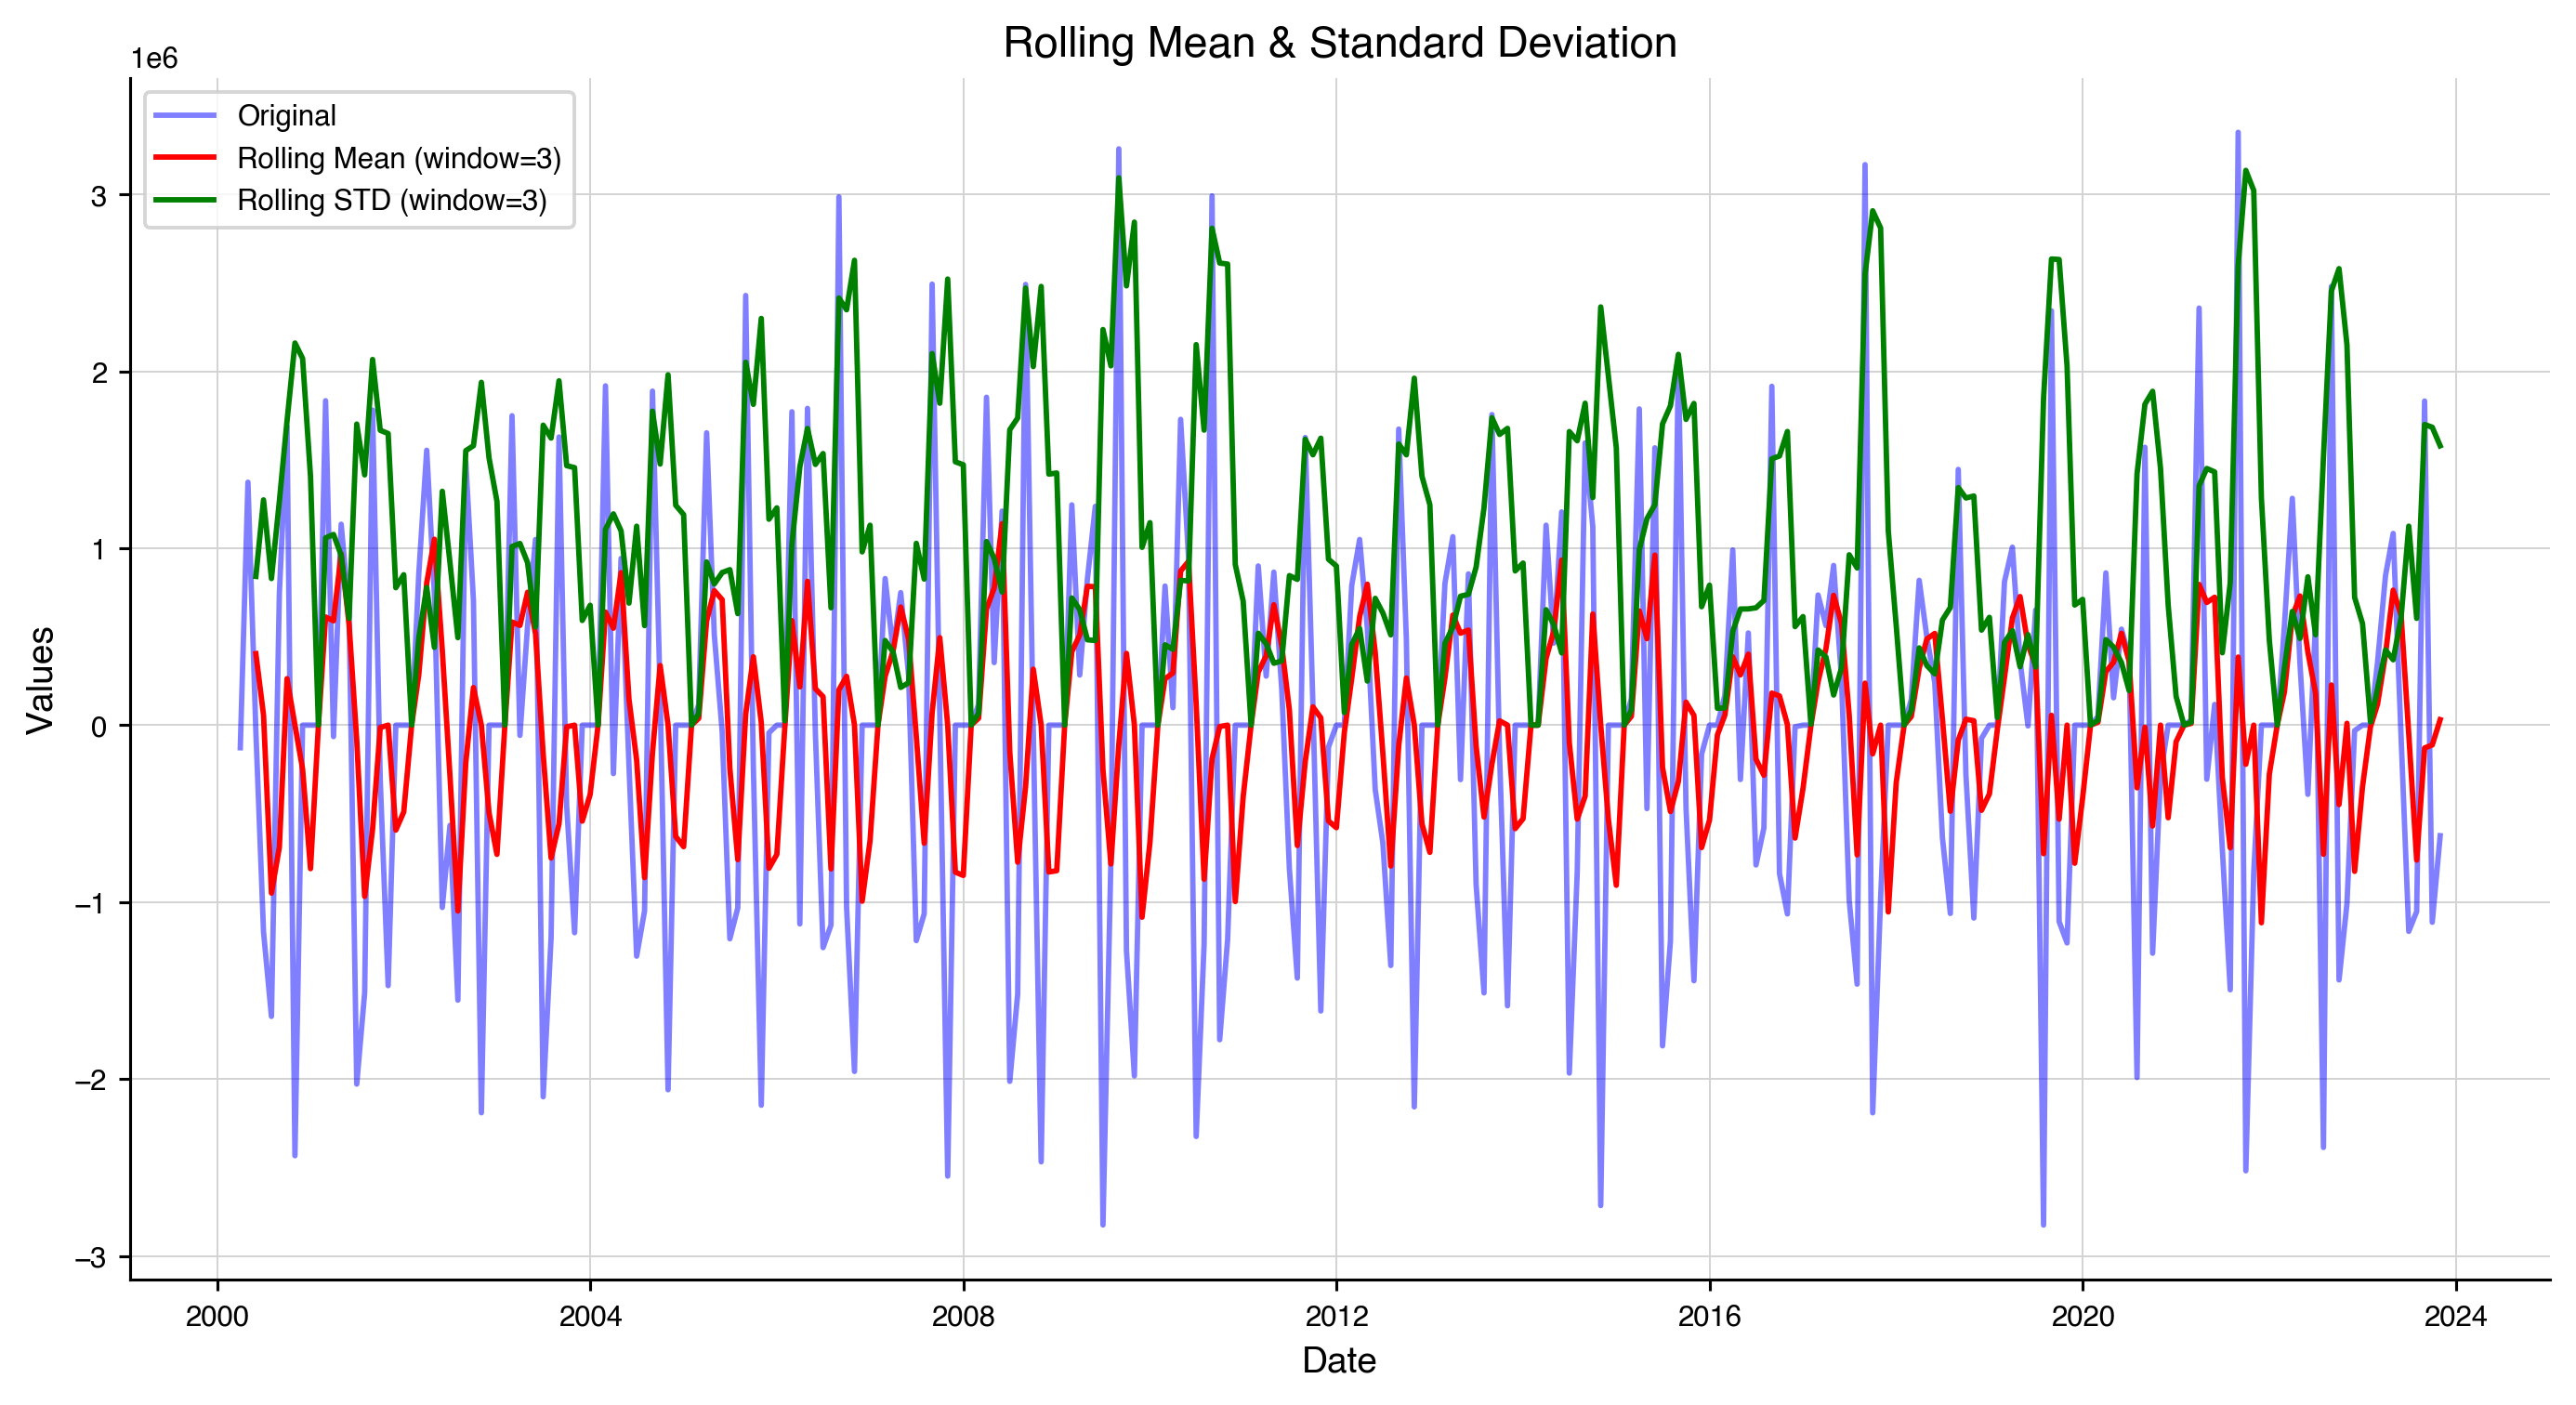

In [188]:
# Plot rolling mean and standard deviation after differencing
plot_rolling_mean_and_std(diff_data, window=3)

In [190]:
# Perform the Augmented Dickey-Fuller test on the differenced data
perform_adf_test(diff_data)
perform_kpss_test(diff_data)

ADF Statistic: -6.926411
p-value: 0.000000
Critical Values:
   1%: -3.4548039258751206
   5%: -2.872304928618605
   10%: -2.5725063100137175

Kwiatkowski-Phillips-Schmidt-Shin test
---------------------------------------------
KPSS Statistic: 0.038247
p-value: 0.100000
Number of lags used: 20
Critical values of KPSS test:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739


**Observation**
- Stationarity Achieved:
Both the rolling mean (red) and rolling standard deviation (green) remain relatively stable over time, indicating that differencing has helped stabilize the time series.
The rolling mean is centered around zero, and the rolling standard deviation shows no increasing or decreasing trend, which are both indicators of a stationary time series.

- Remaining Fluctuations:

Although differencing has reduced the overall trends, the series still shows some volatility, as evidenced by the fluctuations in the original (blue) line.


- Test Results after differentiating

    - The ADF statistic (-6.926411) is much smaller (more negative) than all the critical values (1%, 5%, and 10% levels). The p-value (0.000000) is much smaller than 0.05, which means we can reject the null hypothesis that the series has a unit root (non-stationary). Therefore, the ADF test indicates that the time series is stationary after differencing.
    - The KPSS statistic (0.038247) is below all the critical values, and the p-value (0.100000) is greater than 0.05. This means we fail to reject the null hypothesis that the series is stationary. The KPSS test confirms that the series is stationary.


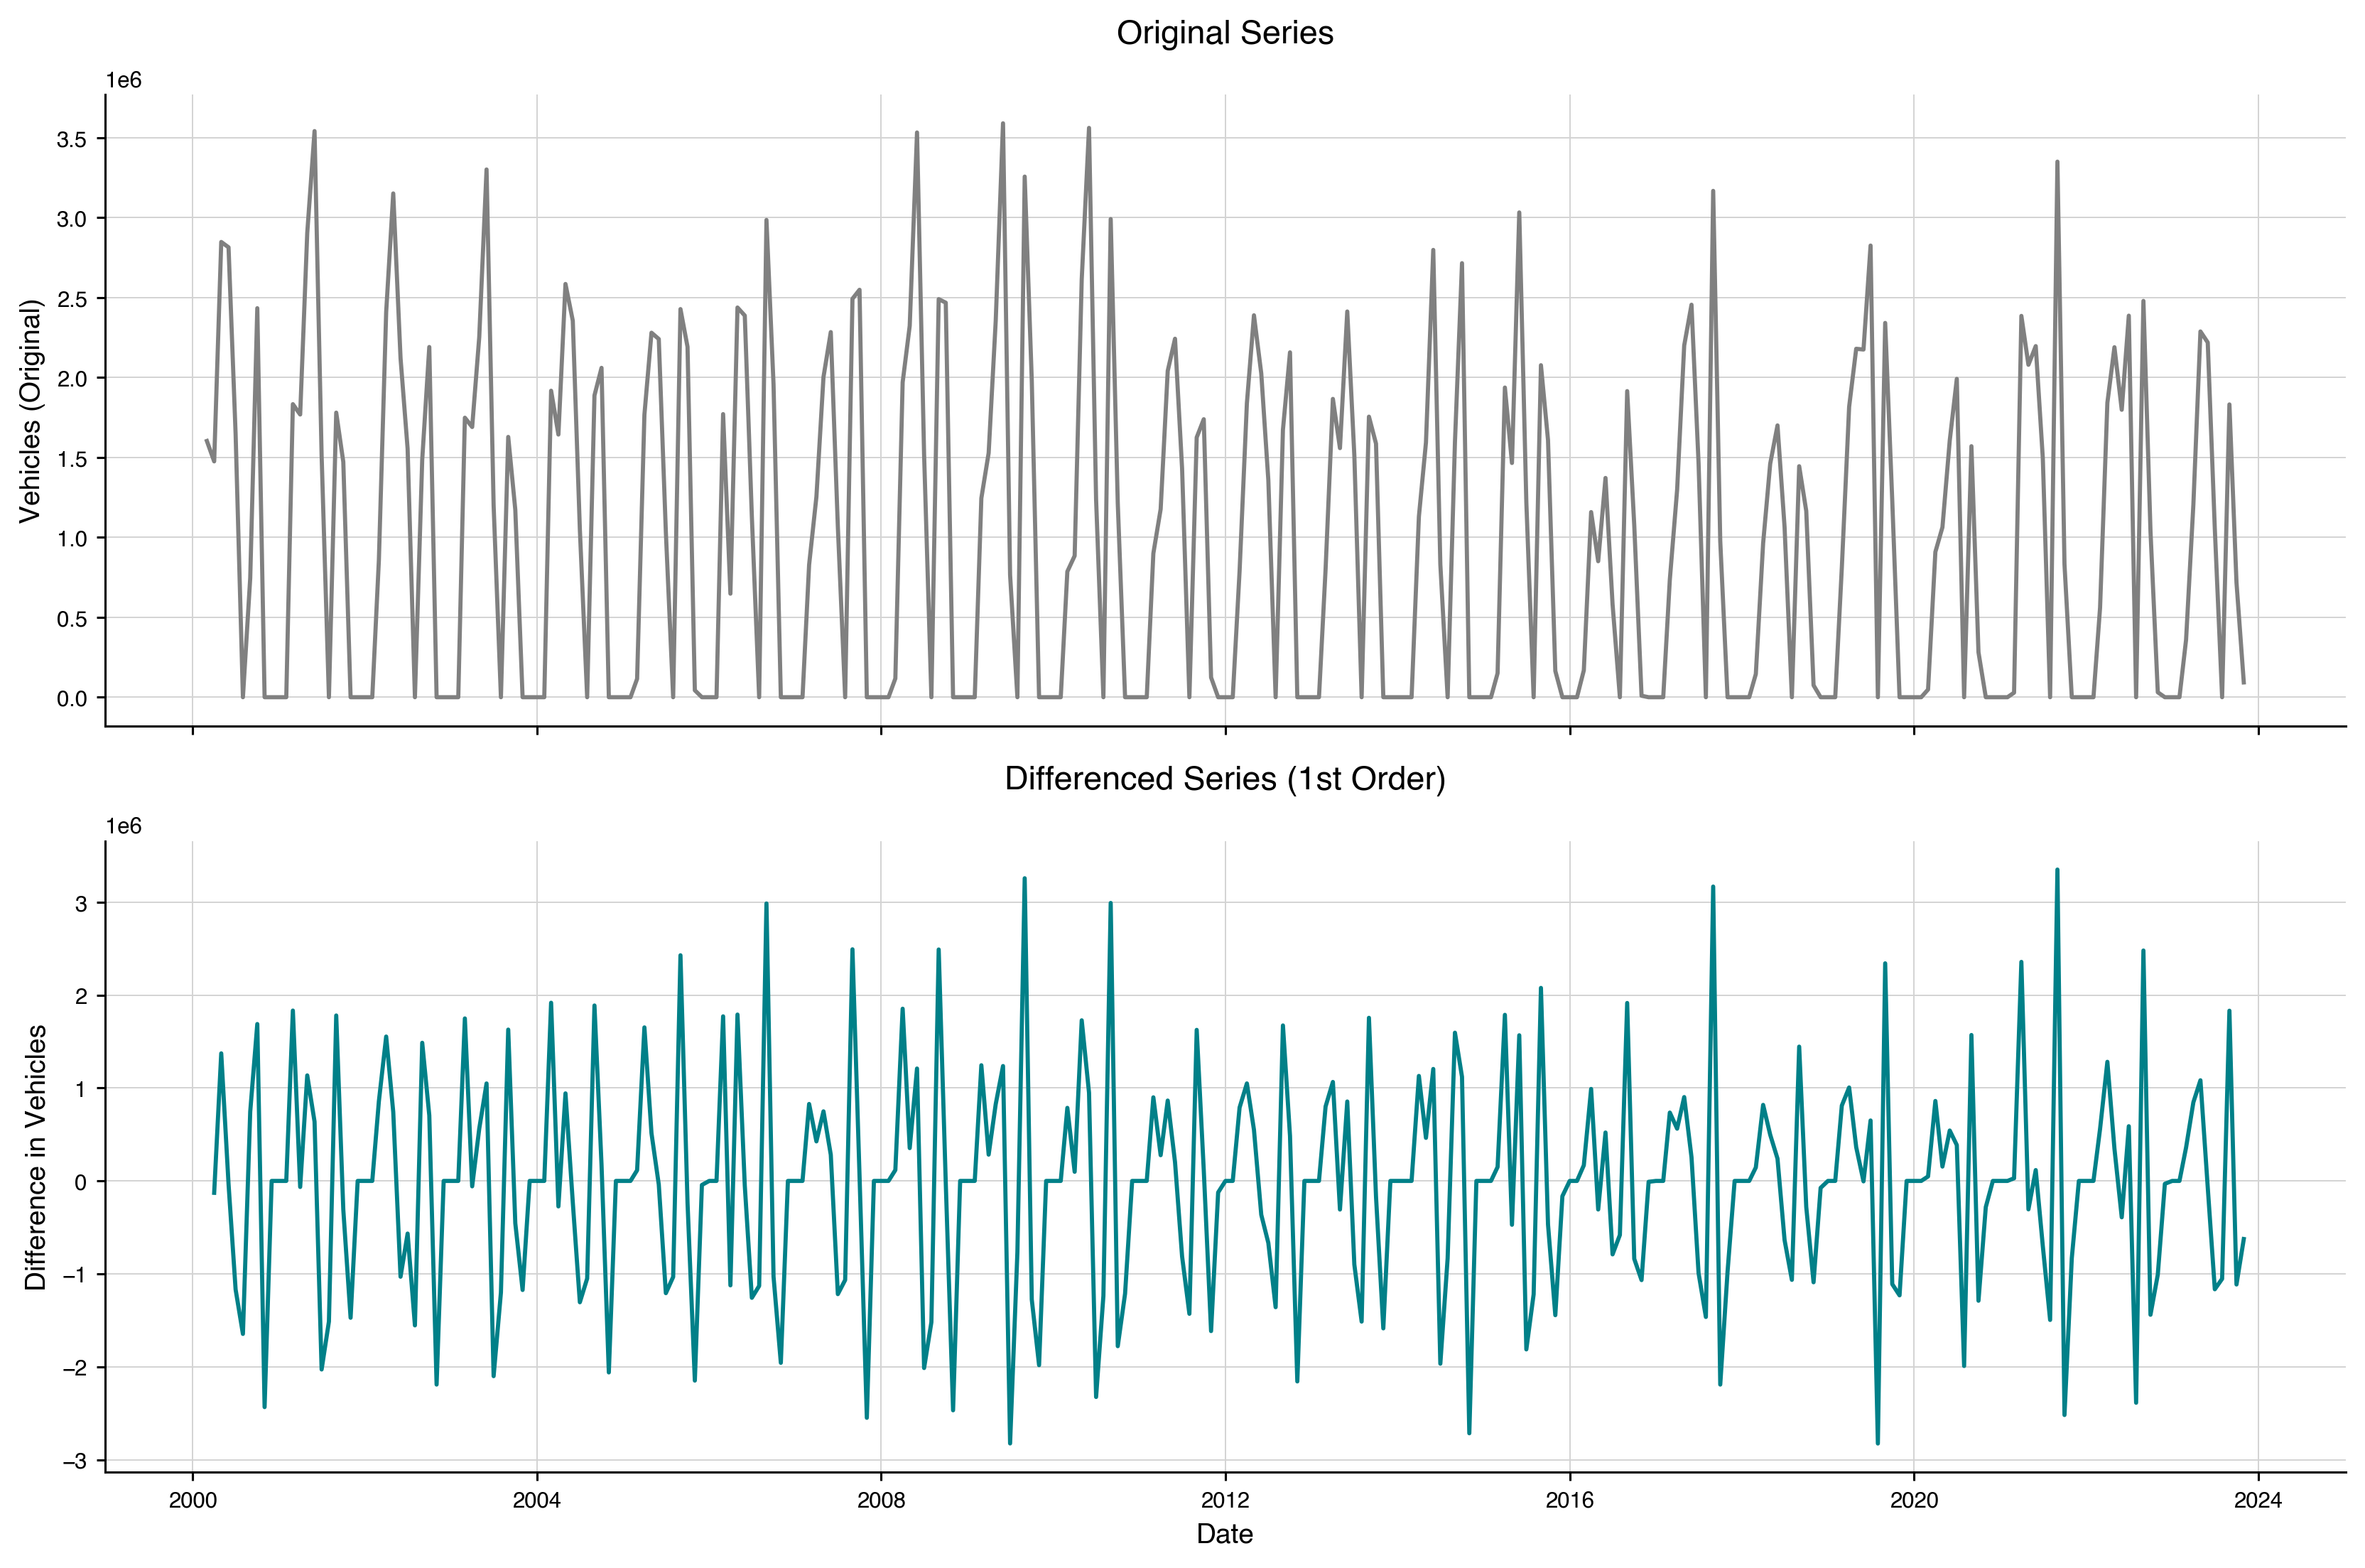

In [192]:
# Create the figure and two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))

# Plot the original data in the first subplot
ax1.plot(monthly_data['all_motor_vehicles'], color='#808080')
ax1.set_ylabel('Vehicles (Original)')
ax1.set_title('Original Series\n')

# Plot the differenced data in the second subplot
ax2.plot(diff_data, color='#008088')
ax2.set_xlabel('Date')
ax2.set_ylabel('Difference in Vehicles')
ax2.set_title('Differenced Series (1st Order)\n')

# Add a grid and show the plot
ax1.grid(True)
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Notes**
- The original series had strong cyclical fluctuations and possible trends over time. After applying first-order differencing, the series has become stationary, with stable fluctuations around zero. 

# EDA: Autorrelation Analysis

**Consideration**

Autocorrelation measures the relationship between a time series's current value and its past values (lags), helping to determine if the present state of the series is influenced by previous observations. This is important for building forecasting models.


In [58]:
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt

def lag_plots(series: pd.Series, lags=[1, 12, 24]) -> None:
    """
    This function plots the lag correlation between 
    current y(t) and y(t-1), y(t-12), and y(t-24) lags (default) 
    or any custom lag provided.
    
    Args:
        series (pd.Series): The time series data (single column).
        lags (list): List of lag values for which to create lag plots.
    
    Returns:
        None
    """
    
    # Number of subplots based on the number of lags
    num_lags = len(lags)
    fig, axes = plt.subplots(1, num_lags, figsize=(16, 9), facecolor='w')
    
    # Loop over the lags to create lag plots for each specified lag
    for i, lag in enumerate(lags):
        lag_plot(series, lag=lag, ax=axes[i], c='#187bcd' if i % 2 == 0 else 'grey')
        axes[i].set_title(f"y(t+{lag})", fontsize=15, pad=10)
        axes[i].grid(linestyle=":", color='grey')
    
    
    plt.tight_layout()
    plt.show()

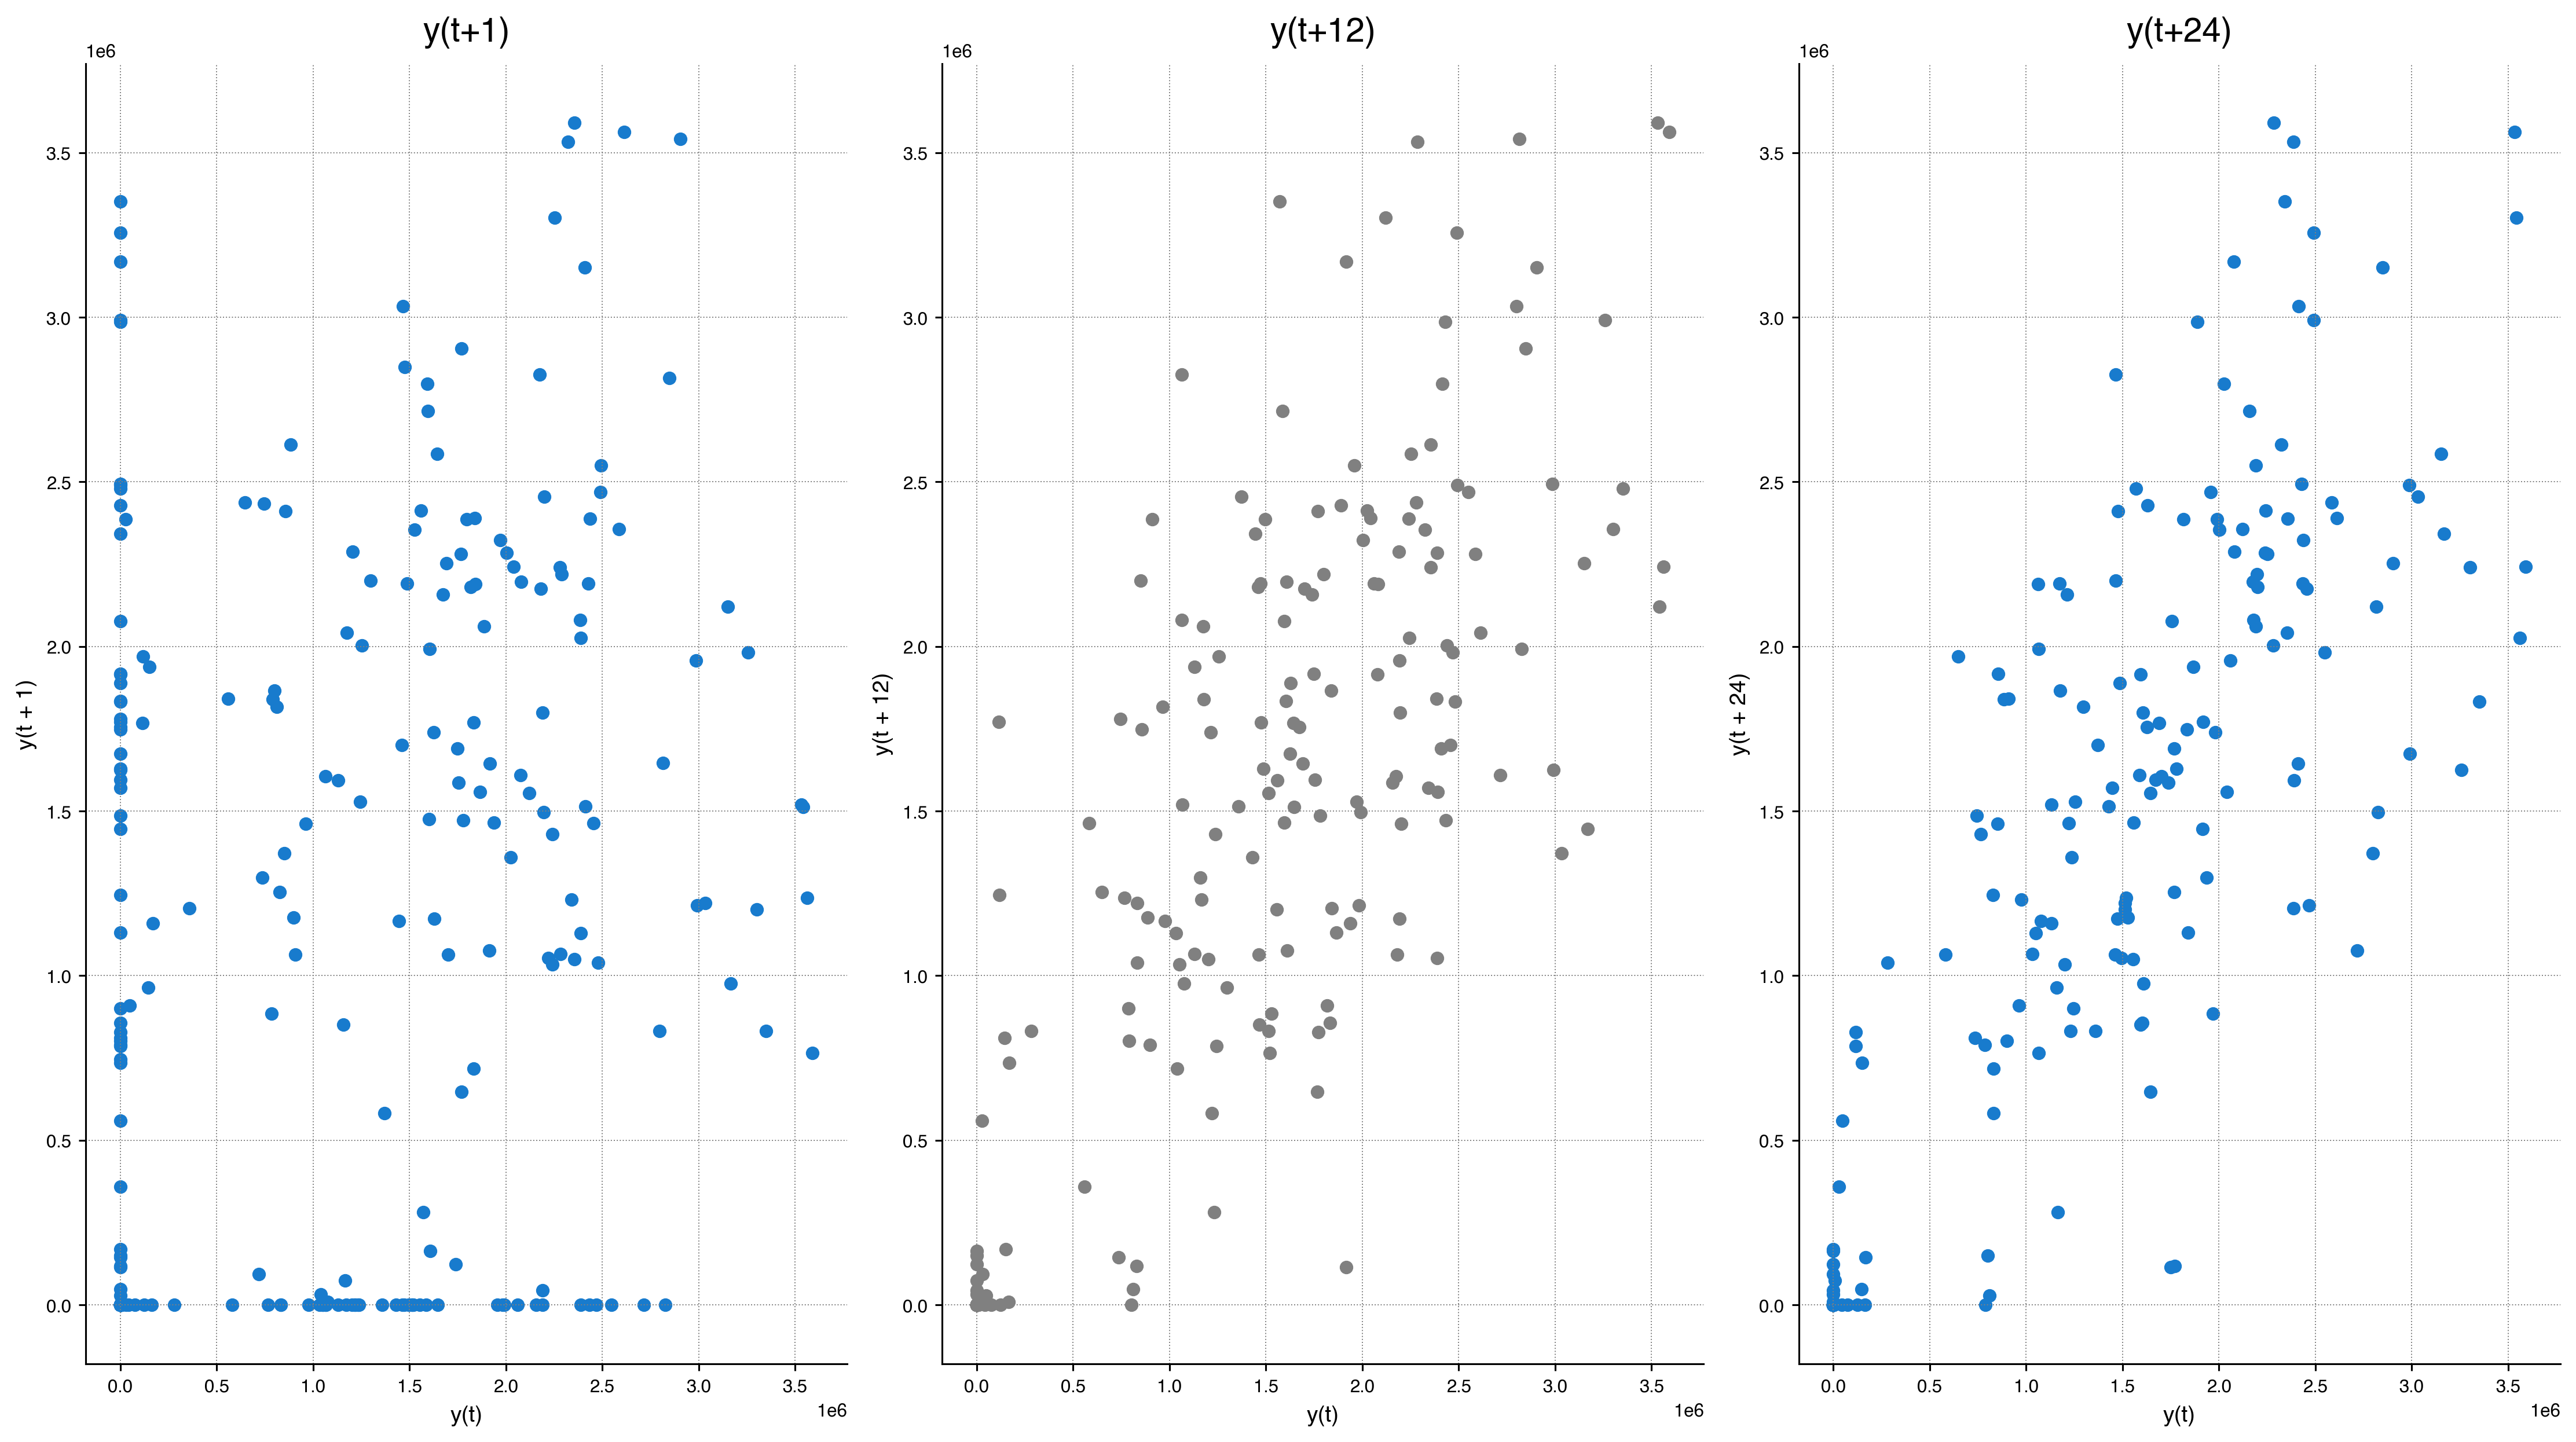

In [59]:
# Plot lag correlations for original series
lag_plots(monthly_data['all_motor_vehicles'], lags=[1, 12, 24])  

**Key Insights:**

**Overall, the Autocorrelation weakens as the lag increases, meaning that earlier values have less influence on future values as the gap increases.**

- Lag 1 (y(t+1)): There is some autocorrelation at lag 1, which implies that the values in the time series are somewhat influenced by their immediately preceding values.
- Lag 12 (y(t+12)): The autocorrelation is weaker, but there might be a hint of a seasonal pattern. This aligns with the monthly cycle data we are attempting to forecast.
- Lag 24 (y(t+24)): The autocorrelation is much weaker at this lag, indicating that values 24 time periods apart (perhaps two years in monthly data) are not strongly related.



## Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

**Notes**

Using ACF and PACF plots to further determine whether there is seasonality or trend in the data can provide useful insights when using Prophet for time series modelling.


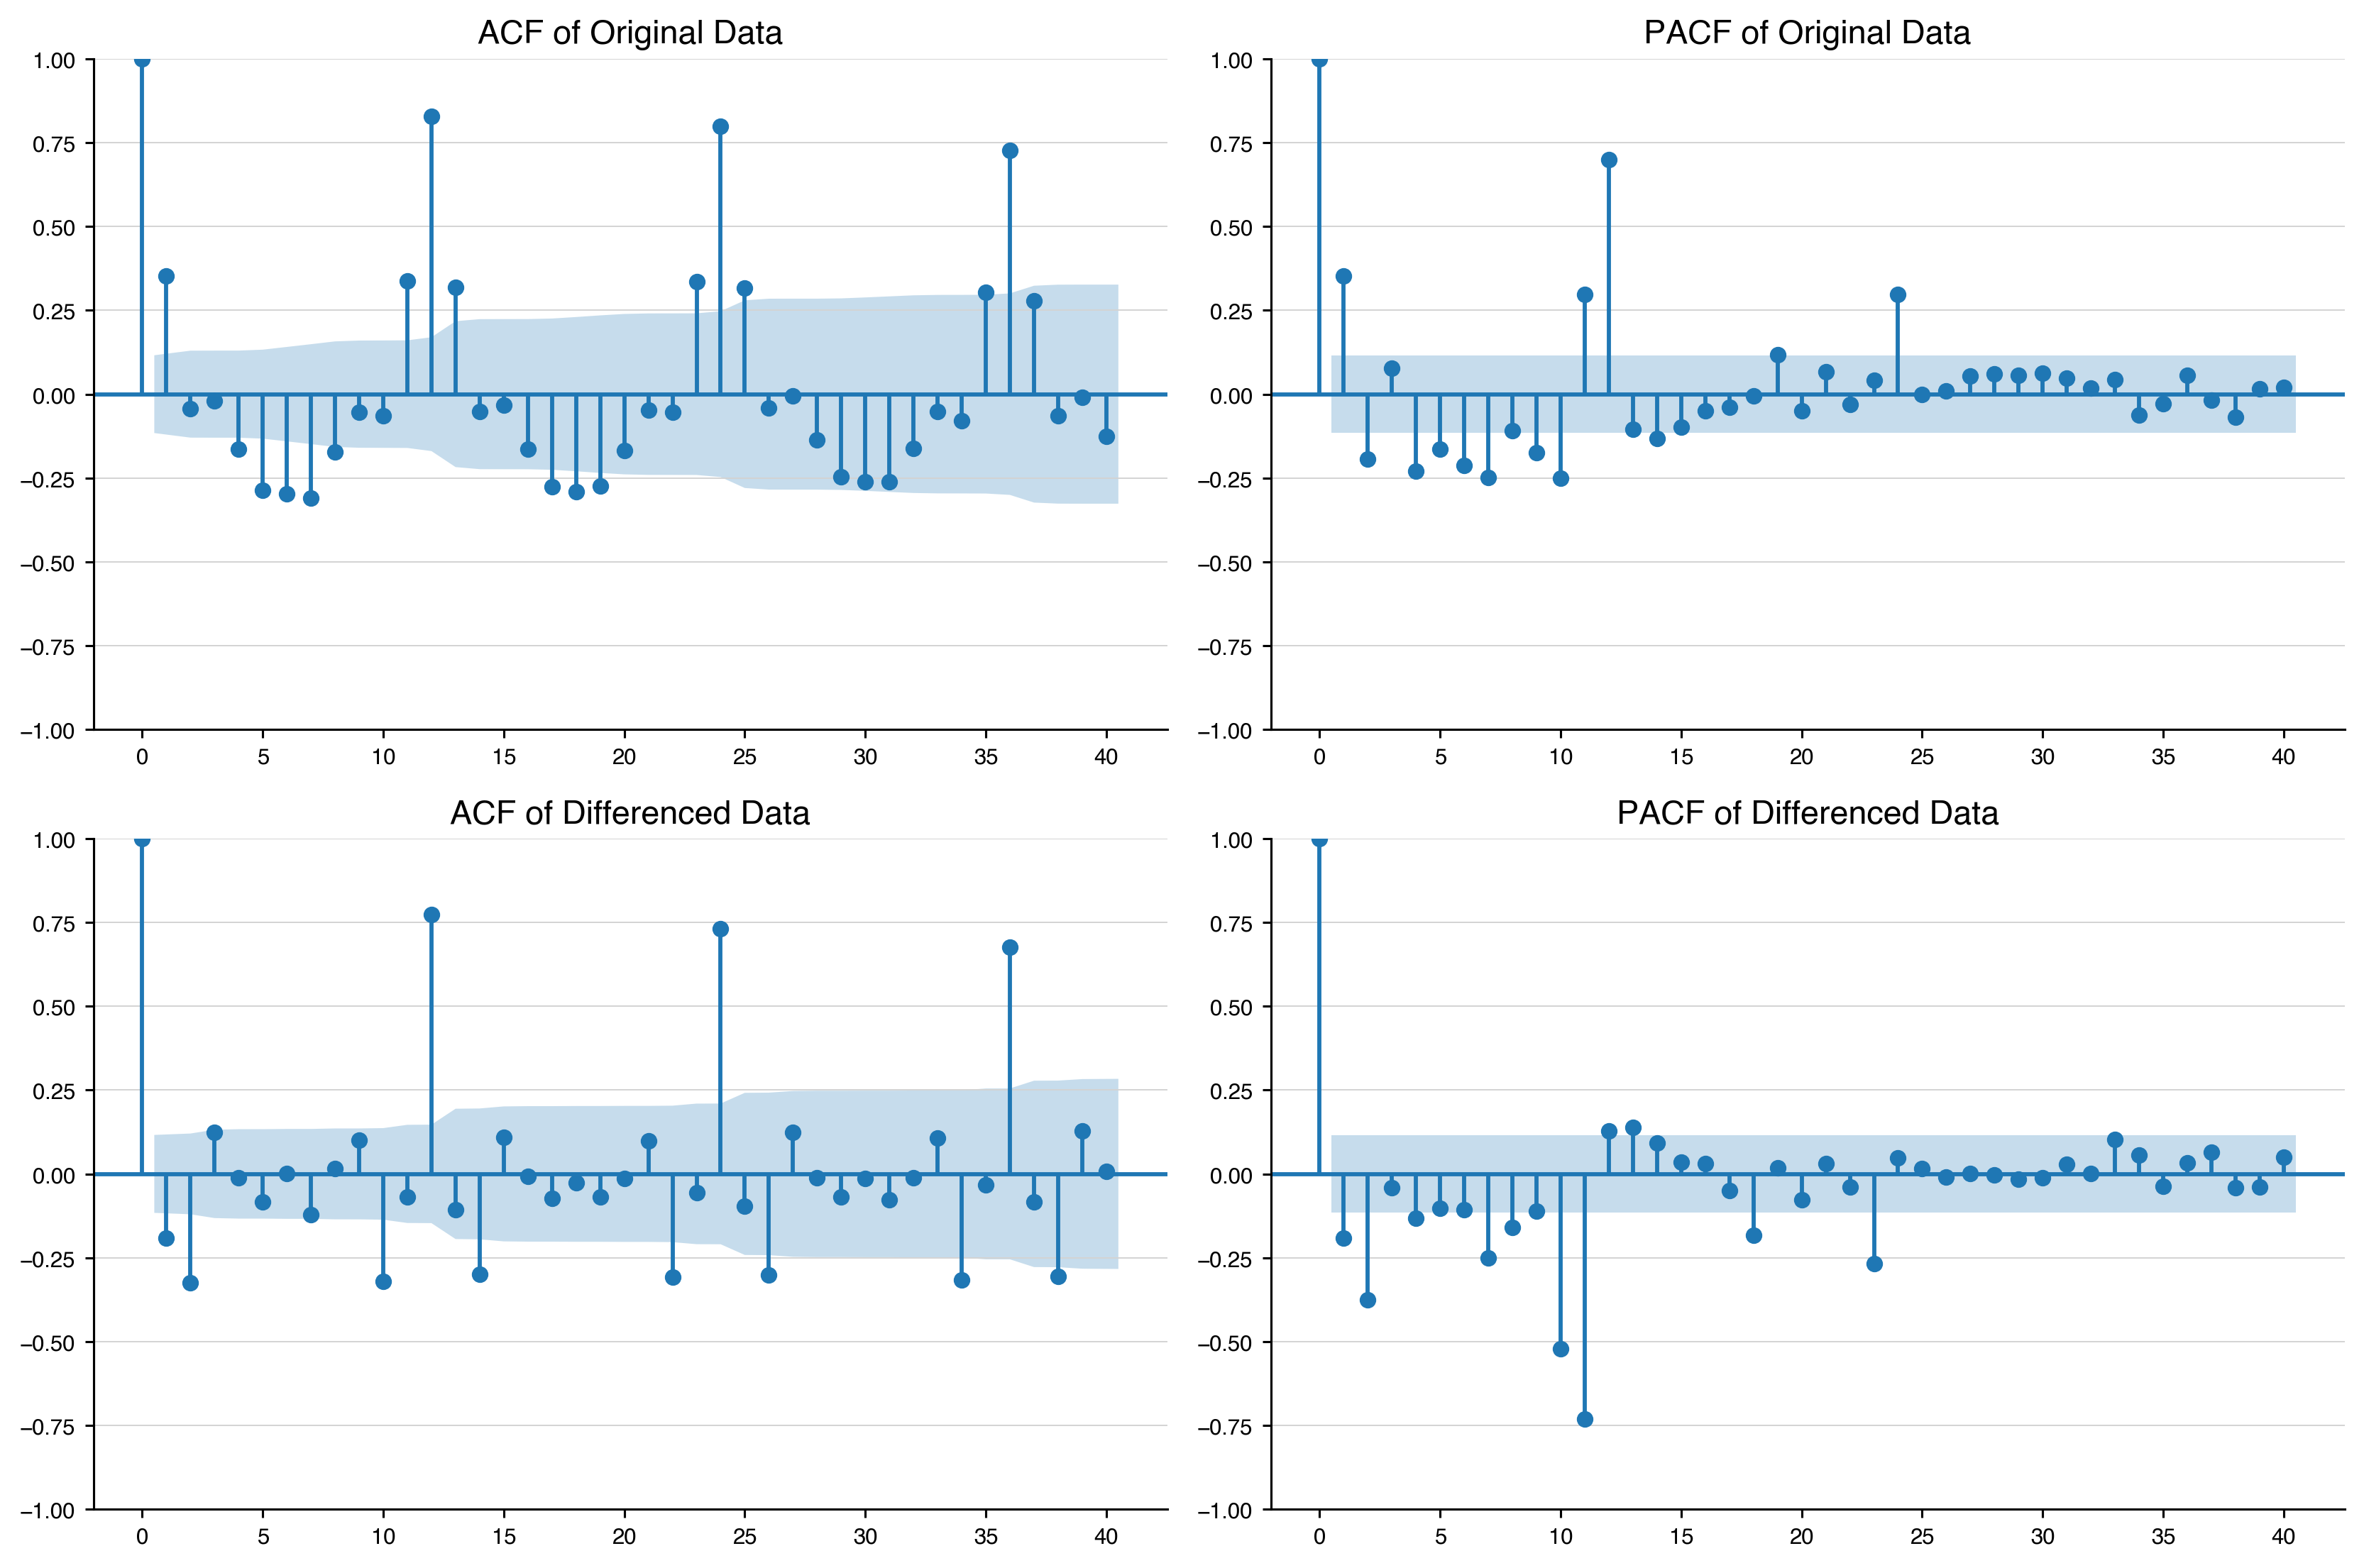

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Apply first-order differencing to the data
diff_data = monthly_data['all_motor_vehicles'].diff().dropna()

# Create subplots for ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(12, 8))

# Plot the ACF for the original data
plot_acf(monthly_data['all_motor_vehicles'].dropna(), lags=40, ax=ax1[0])
ax1[0].set_title('ACF of Original Data')

# Plot the PACF for the original data
plot_pacf(monthly_data['all_motor_vehicles'].dropna(), lags=40, ax=ax1[1])
ax1[1].set_title('PACF of Original Data')

# Plot the ACF for the differenced data
plot_acf(diff_data, lags=40, ax=ax2[0])
ax2[0].set_title('ACF of Differenced Data')

# Plot the PACF for the differenced data
plot_pacf(diff_data, lags=40, ax=ax2[1])
ax2[1].set_title('PACF of Differenced Data')

# Display the plots
plt.tight_layout()
plt.show()

**Observation**

- Original Data
  - The PACF shows a strong correlation at the first lag, with significant spikes at lags 10 and 25, indicating autocorrelation in the time series. Significant spikes at lags 10, 20, 25, and 35 suggest dependencies at these lags.
 
- Differentiated Data
    - The ACF plot for the differenced data shows a quick drop in correlation after lag 1, suggesting the removal of the trend and increased stationarity. Only lag 10 and 25 show significant spikes, indicating weaker autocorrelation than the original data.

    - The PACF also displays a significant spike at lag 1, followed by smaller spikes at lag 10 and 25, suggesting residual autoregressive behavior in the differenced series, but with improved stationarity compared to the original data.


# EDA: Decomposition

**Understand the different components of the time series and how they influence the overall traffic data**
- Get a clear view of the underlying components of the time series (trend, seasonality, residuals)

In [194]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_series(series: pd.Series, period: int, title: str) -> None:
    """
    This function decomposes the time series into trend, seasonality, and residuals.
    
    Args:
        series (pd.Series): The time series data to decompose.
        period (int): The number of observations per cycle (e.g., 12 for monthly data).
        title (str): Title for the plot.
    
    Returns:
        None
    """
    # Decomposition
    decomposition = seasonal_decompose(series, model='additive', period=period)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot decomposition
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10), facecolor='w')

    ax1.plot(series, label='Original', color='blue')
    ax1.set_title('Original Series')
    ax1.legend()

    ax2.plot(trend, label='Trend', color='red')
    ax2.set_title('Trend')
    ax2.legend()

    ax3.plot(seasonal, label='Seasonality', color='green')
    ax3.set_title('Seasonality')
    ax3.legend()

    ax4.plot(residual, label='Residuals', color='orange')
    ax4.set_title('Residuals')
    ax4.legend()

    # Add title and layout adjustments
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [196]:
monthly_data.columns

Index(['all_motor_vehicles'], dtype='object')

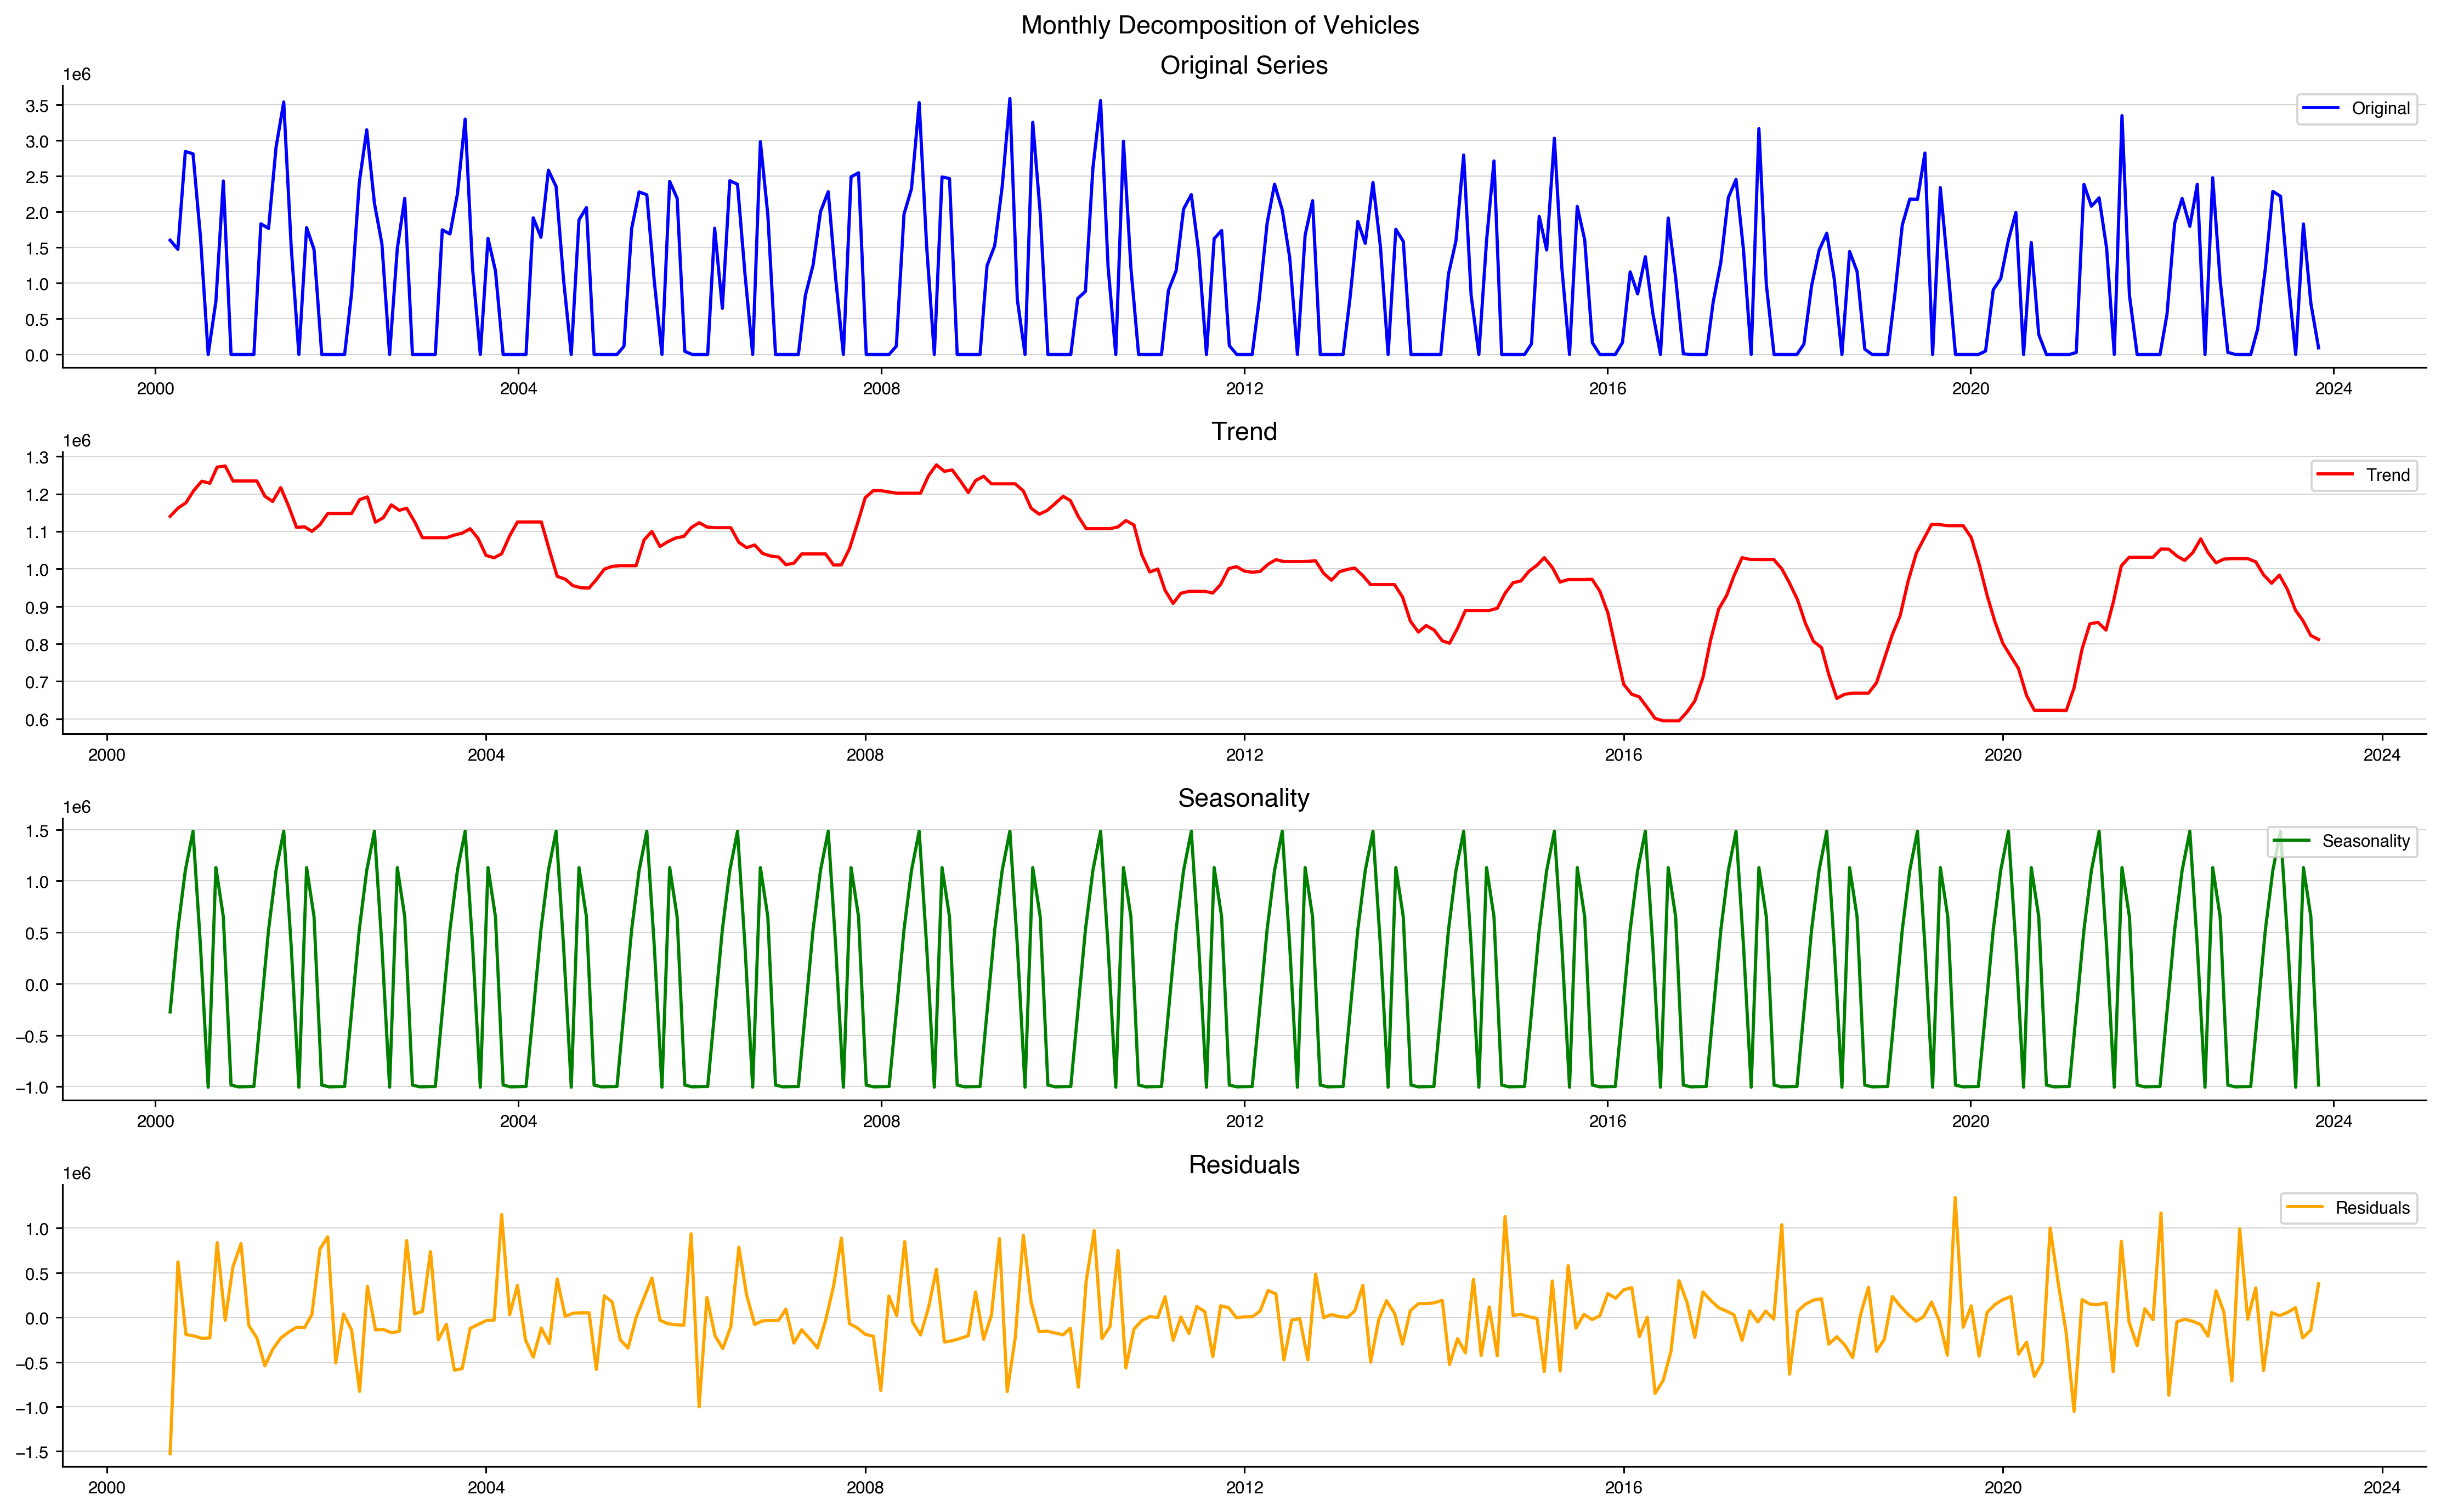

In [198]:

# Decompose the monthly data for 'cars_and_taxis_x'
decompose_series(monthly_data['all_motor_vehicles'], period=12, title='Monthly Decomposition of Vehicles')

**Key Insights**

The graph displays the raw vehicle count data, showing both seasonal and trend-based elements. 

- The trend indicates long-term shifts in vehicle usage, with a decline around 2008–2014 followed by a recovery and another slight decline in recent years.
- The seasonality is strong and consistent, indicating a predictable annual cycle in vehicle counts.
- The residuals are relatively small and centered around zero, suggesting that most of the variation in the data has been explained by the trend and seasonal components.


In [200]:
diff_data.head()

timestamp
2000-04-01    -127784.0
2000-05-01    1372957.0
2000-06-01     -33568.0
2000-07-01   -1168490.0
2000-08-01   -1646437.0
Freq: MS, Name: all_motor_vehicles, dtype: float64

# Modeling

**Notes**
- Using Facebook Prophet to help capture trends, seasons and any other events in our traffic data time series prediction

In [218]:
modeling_data = monthly_data.reset_index() 
modeling_data.head()

timestamp  all_motor_vehicles
0 2000-03-01           1603322.0
1 2000-04-01           1475538.0
2 2000-05-01           2848495.0
3 2000-06-01           2814927.0
4 2000-07-01           1646437.0

In [220]:
modeling_data.columns

Index(['timestamp', 'all_motor_vehicles'], dtype='object')

In [222]:
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           285 non-null    datetime64[ns]
 1   all_motor_vehicles  285 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB


In [226]:
# Determine target variable and feature

prophet_data = modeling_data[['timestamp', 'all_motor_vehicles']].rename(columns={'timestamp': 'ds', 'all_motor_vehicles': 'y'})

In [228]:
prophet_data.head()

ds          y
0 2000-03-01  1603322.0
1 2000-04-01  1475538.0
2 2000-05-01  2848495.0
3 2000-06-01  2814927.0
4 2000-07-01  1646437.0

In [234]:
prophet_data['y'].head(10)

0    1603322.0
1    1475538.0
2    2848495.0
3    2814927.0
4    1646437.0
5          0.0
6     745411.0
7    2433959.0
8          0.0
9          0.0
Name: y, dtype: float64

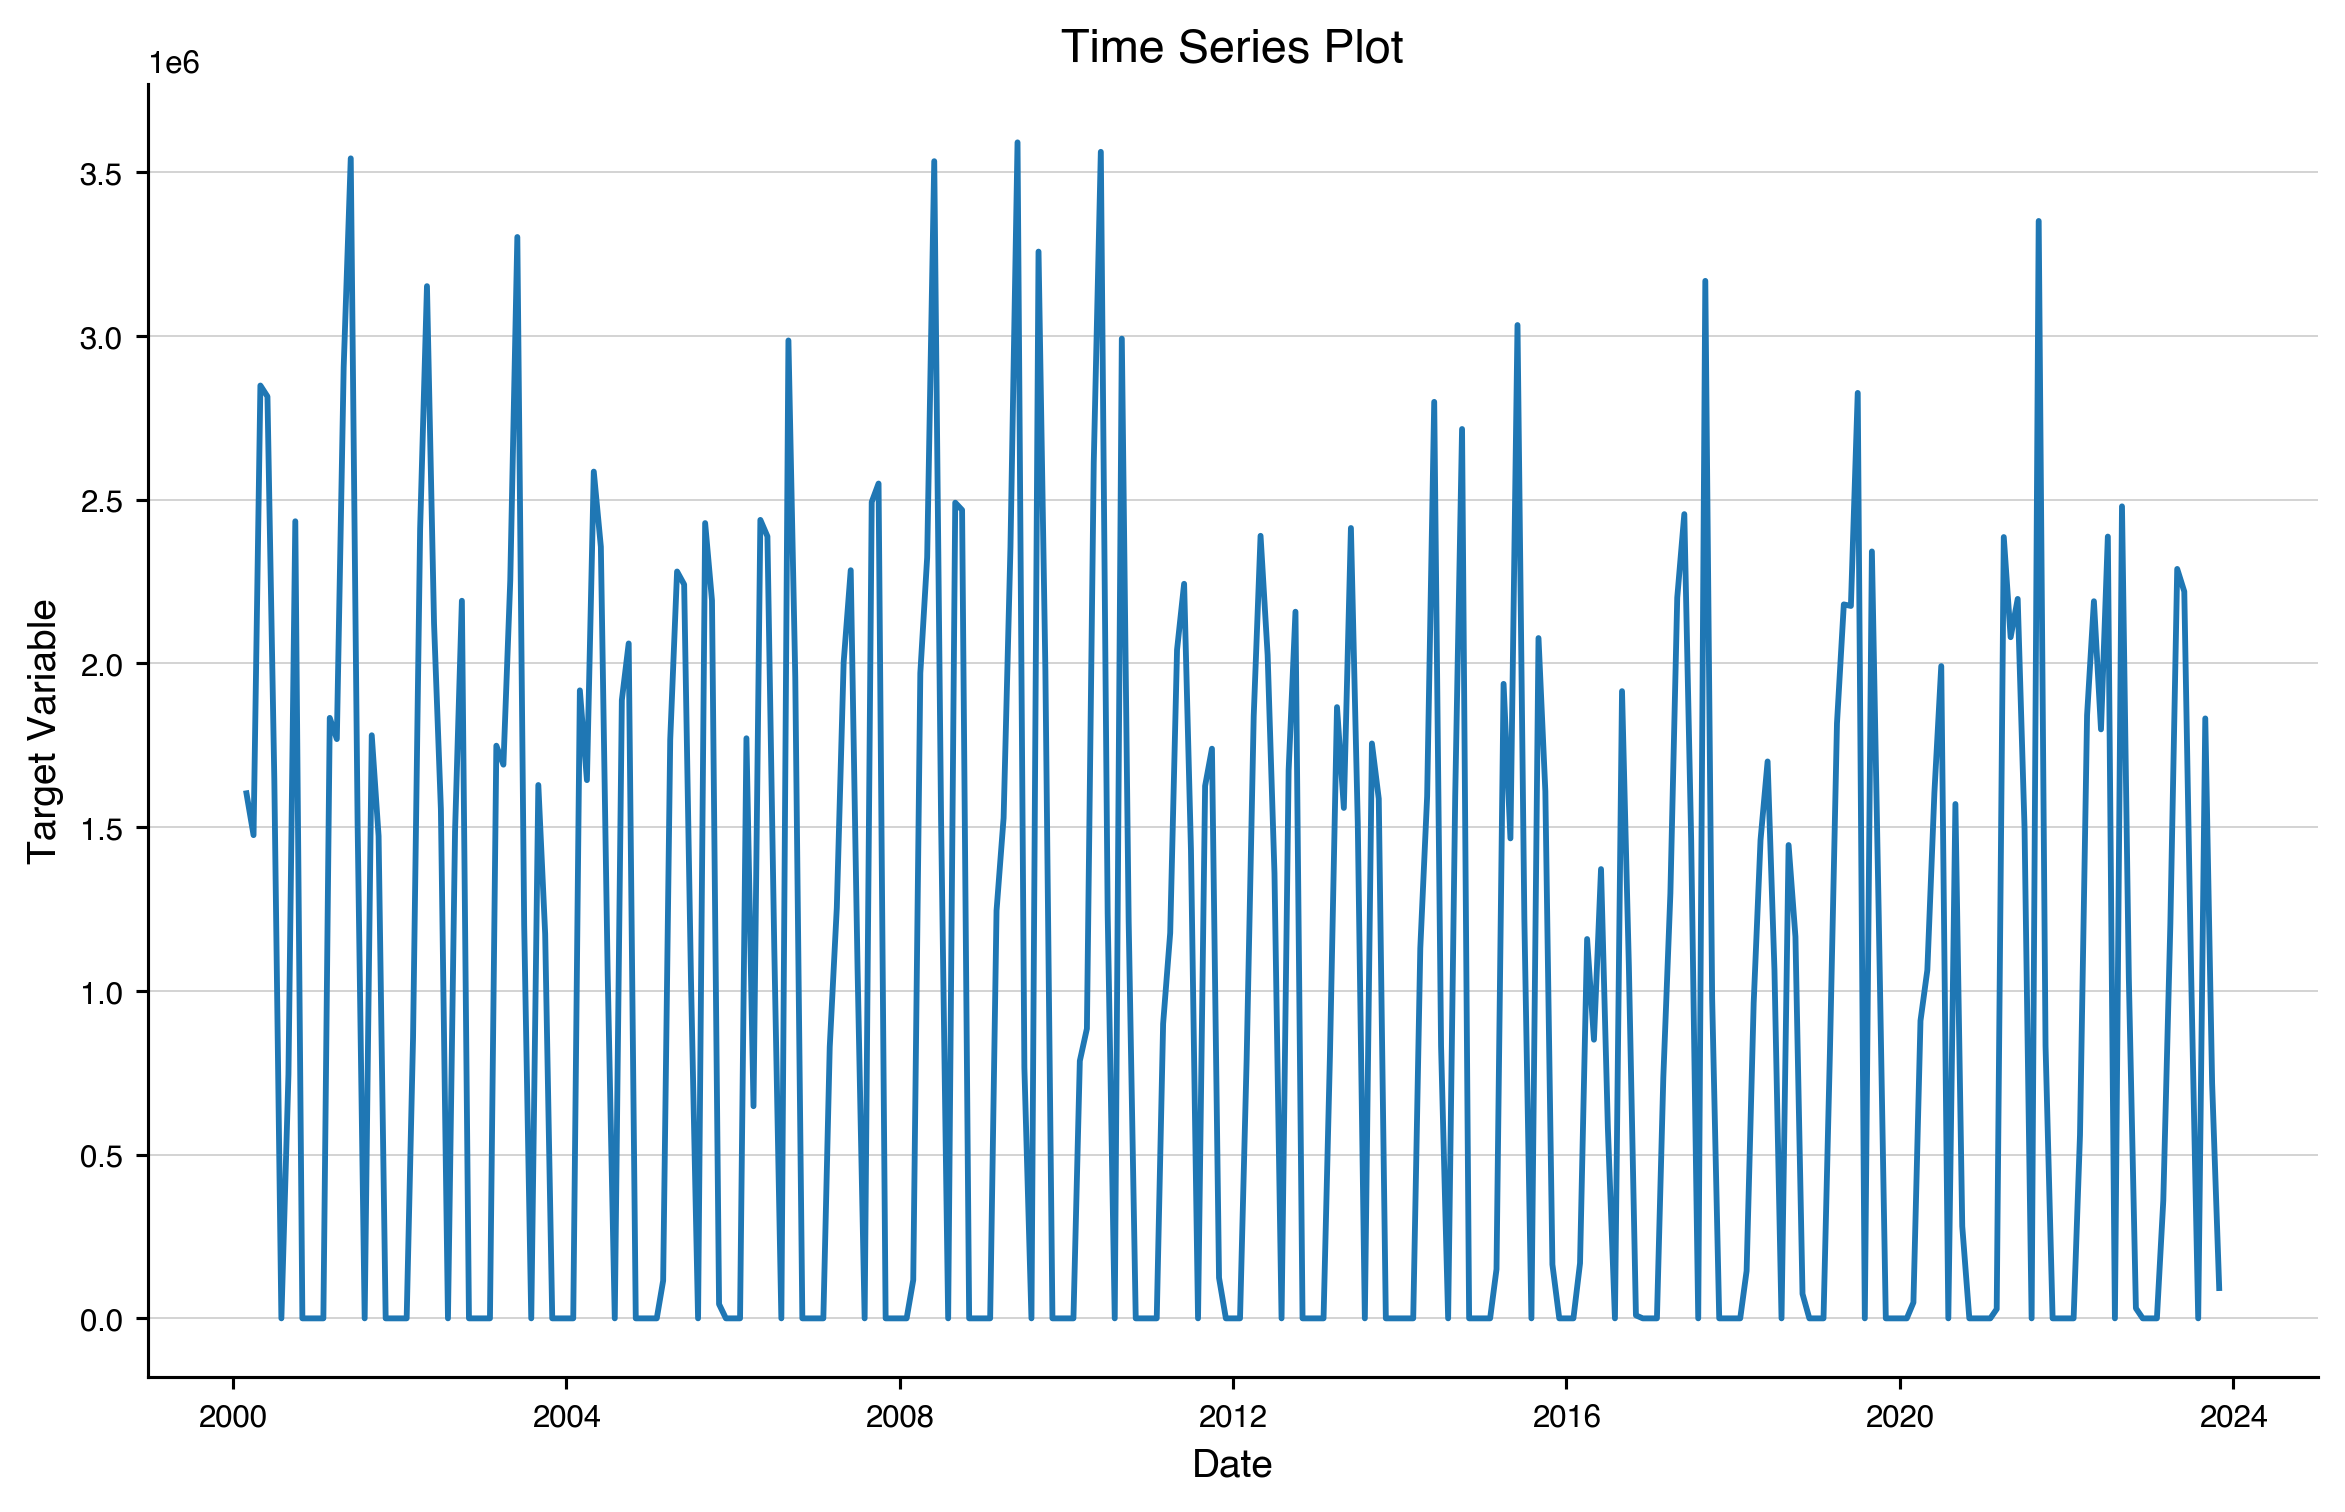

In [236]:
# Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(prophet_data['ds'], prophet_data['y'])
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.title('Time Series Plot')
plt.show()

**Observation**

**Observations:**
- The data shows significant fluctuations in the "Target Variable" over time, with numerous peaks and troughs indicating dynamic and frequent changes in the target variable within short time intervals.
- Moreover, there are noticeable seasonal or cyclical patterns, suggesting that vehicle counts follow a regular seasonal pattern.

**Note:**
- We will utilize Facebook Prophet to capture the underlying seasonality and trend in order to make reliable predictions.

### Train/Test Split

In [238]:
prophet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      285 non-null    datetime64[ns]
 1   y       285 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB


In [242]:
ptrain = prophet_data.loc[prophet_data.ds <= "2020-12-01", :] # training dataset to include all data points less than or equal to December 1, 2020.
ptest = prophet_data.loc[prophet_data.ds > "2020-12-01", :] # test dataset to include all data points greater than December 1, 2020.

In [246]:
ptrain.head()

ds          y
0 2000-03-01  1603322.0
1 2000-04-01  1475538.0
2 2000-05-01  2848495.0
3 2000-06-01  2814927.0
4 2000-07-01  1646437.0

In [252]:
ptrain.shape

(250, 2)

In [248]:
ptest.head()

ds          y
250 2021-01-01        0.0
251 2021-02-01        0.0
252 2021-03-01    28464.0
253 2021-04-01  2385769.0
254 2021-05-01  2079972.0

In [250]:
ptest.shape

(35, 2)

In [254]:
# Build and fit the model on the training data
from prophet import Prophet

model = Prophet() # Initialize the Prophet model
model.fit(ptrain) # Fit the model 


22:35:16 - cmdstanpy - INFO - Chain [1] start processing
22:35:16 - cmdstanpy - INFO - Chain [1] done processing


### Create Future Dates for Predictions

In [258]:
# Forecasting into the future
future = model.make_future_dataframe(periods=24, freq='MS')  

In [260]:
future.tail()

ds
269 2022-08-01
270 2022-09-01
271 2022-10-01
272 2022-11-01
273 2022-12-01

### Make Predictions

In [262]:
# Generate forecasts on the test set
forecast = model.predict(future)

In [264]:
forecast.head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2000-03-01  1.243930e+06  4.866058e+05  1.574117e+06  1.243930e+06   
1 2000-04-01  1.242105e+06  1.200579e+06  2.227487e+06  1.242105e+06   
2 2000-05-01  1.240340e+06  1.810462e+06  2.887548e+06  1.240340e+06   
3 2000-06-01  1.238516e+06  2.196357e+06  3.316736e+06  1.238516e+06   
4 2000-07-01  1.236750e+06  9.996318e+05  2.075856e+06  1.236750e+06   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  1.243930e+06   -1.977925e+05         -1.977925e+05         -1.977925e+05   
1  1.242105e+06    4.683047e+05          4.683047e+05          4.683047e+05   
2  1.240340e+06    1.104588e+06          1.104588e+06          1.104588e+06   
3  1.238516e+06    1.527383e+06          1.527383e+06          1.527383e+06   
4  1.236750e+06    3.234463e+05          3.234463e+05          3.234463e+05   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0 -1.977925e+05 -1.977925e+05 -1.977925e+05                   0.0   
1  4.683047e+05  4.683047e+05  4.683047e+05                   0.0   
2  1.104588e+06  1.104588e+06  1.104588e+06                   0.0   
3  1.527383e+06  1.527383e+06  1.527383e+06                   0.0   
4  3.234463e+05  3.234463e+05  3.234463e+05                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  1.046137e+06  
1                         0.0                         0.0  1.710410e+06  
2                         0.0                         0.0  2.344928e+06  
3                         0.0                         0.0  2.765898e+06  
4                         0.0                         0.0  1.560196e+06

In [266]:
forecast.tail()

ds          trend    yhat_lower    yhat_upper    trend_lower  \
269 2022-08-01  762063.830319 -8.386677e+05  3.306151e+05  762063.816329   
270 2022-09-01  760239.466597  1.334333e+06  2.370088e+06  760239.451361   
271 2022-10-01  758473.953317  9.156722e+05  2.038252e+06  758473.936831   
272 2022-11-01  756649.589594 -7.528821e+05  3.308359e+05  756649.571783   
273 2022-12-01  754884.076314 -8.002570e+05  2.648342e+05  754884.056981   

       trend_upper  additive_terms  additive_terms_lower  \
269  762063.844964   -1.016611e+06         -1.016611e+06   
270  760239.482405    1.063249e+06          1.063249e+06   
271  758473.970593    7.060198e+05          7.060198e+05   
272  756649.608206   -9.963345e+05         -9.963345e+05   
273  754884.095843   -1.014216e+06         -1.014216e+06   

     additive_terms_upper        yearly  yearly_lower  yearly_upper  \
269         -1.016611e+06 -1.016611e+06 -1.016611e+06 -1.016611e+06   
270          1.063249e+06  1.063249e+06  1.063249e+06  1.063249e+06   
271          7.060198e+05  7.060198e+05  7.060198e+05  7.060198e+05   
272         -9.963345e+05 -9.963345e+05 -9.963345e+05 -9.963345e+05   
273         -1.014216e+06 -1.014216e+06 -1.014216e+06 -1.014216e+06   

     multiplicative_terms  multiplicative_terms_lower  \
269                   0.0                         0.0   
270                   0.0                         0.0   
271                   0.0                         0.0   
272                   0.0                         0.0   
273                   0.0                         0.0   

     multiplicative_terms_upper          yhat  
269                         0.0 -2.545469e+05  
270                         0.0  1.823489e+06  
271                         0.0  1.464494e+06  
272                         0.0 -2.396849e+05  
273                         0.0 -2.593323e+05

In [268]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper']].tail()

ds          yhat    yhat_lower    yhat_upper    trend_lower  \
269 2022-08-01 -2.545469e+05 -8.386677e+05  3.306151e+05  762063.816329   
270 2022-09-01  1.823489e+06  1.334333e+06  2.370088e+06  760239.451361   
271 2022-10-01  1.464494e+06  9.156722e+05  2.038252e+06  758473.936831   
272 2022-11-01 -2.396849e+05 -7.528821e+05  3.308359e+05  756649.571783   
273 2022-12-01 -2.593323e+05 -8.002570e+05  2.648342e+05  754884.056981   

       trend_upper  
269  762063.844964  
270  760239.482405  
271  758473.970593  
272  756649.608206  
273  754884.095843

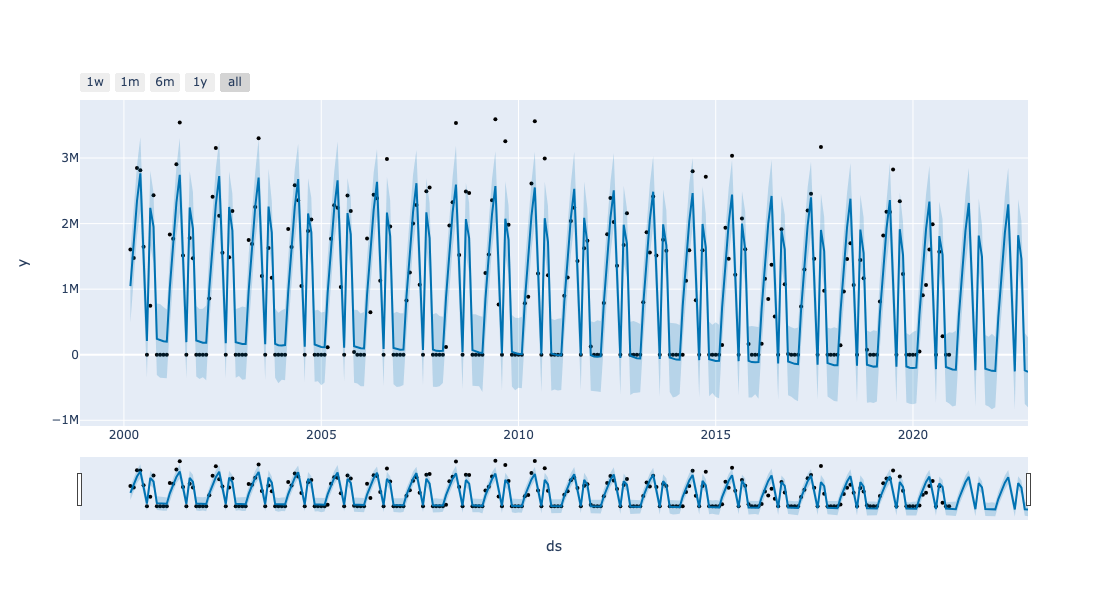

In [270]:
plot_plotly(model, forecast)

**Key Insights**:

**Seasonal Patterns**:

The time series shows consistent seasonal peaks and troughs. The model accurately captures these recurring patterns, reflecting the yearly or monthly cycles observed in all vehicles data. The seasonal pattern remains relatively stable, indicating that the model has effectively captured the underlying seasonality.

**Uncertainty Intervals**:

The shaded blue areas represent the uncertainty intervals (confidence intervals) around the forecast. These intervals are narrow for most of the forecast period, indicating the model's confidence in its predictions based on the observed data. However, as the forecast extends further into the future (closer to 2020 and beyond), the intervals widen slightly, reflecting the normal increase in uncertainty in time series forecasting.

**Fit with Historical Data:**

The black dots represent the actual historical data points, and the blue line shows the model’s fitted values. The model closely aligns with the actual data, capturing the peaks and troughs of the seasonal cycles. However, there are some black dots that fall outside the predicted range, which could signify outliers that the model did not capture 
**Trend:**
Although seasonal fluctuations are prominent, the overall trend appears stable, as the model indicates no significant upward or downward movement. This observation is consistent with the earlier decomposition, which revealed no distinct trend after detrending the data.


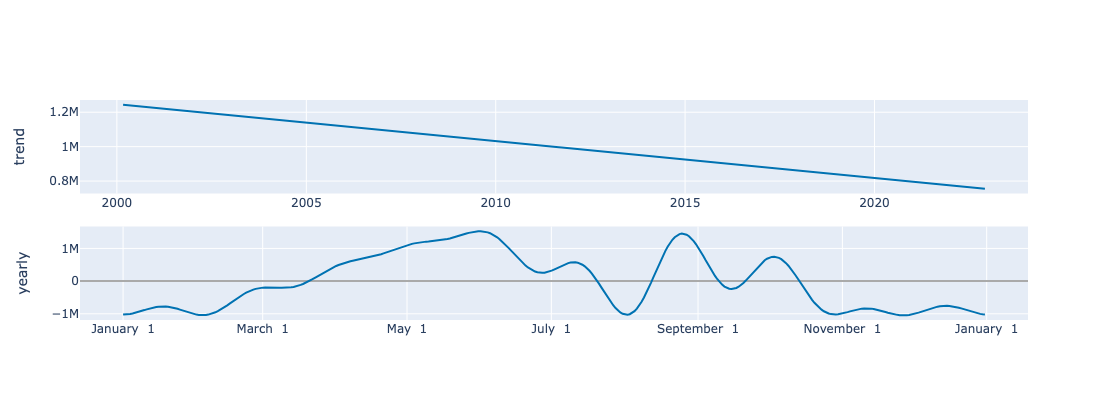

In [272]:
plot_components_plotly(model, forecast)

**More Insights Interpretation**

The component plot function dissects the forecast into its trend and yearly seasonality components, providing a deeper understanding of how the model interprets the data.

- **Trend Component (Top Plot)**:
The trend line depicts a downward trend in the target variable over time. Starting from around 1.2 million vehicle counts, the trend steadily declines, reaching around 0.8 million in 2020. This indicates that, according to the Prophet model, the overall usage or counts of vehicles have been decreasing over the years.

- **Yearly Seasonality Component (Bottom Plot):**
The yearly seasonality plot illustrates how the target variable changes throughout the year, capturing regular fluctuations that repeat each year. It reveals higher vehicle counts around August and September, followed by a dip toward the end of the year, likely corresponding to decreased travel or vehicle usage during the colder months.

There's another peak around May, followed by a slight drop during the summer months before the large spike in August. The lowest points appear to be around January and November/December, suggesting lower vehicle activity during these months, possibly related to seasonal holidays or weather conditions.

**Notes:**
- Overall, the model identifies a significant long-term decline in vehicle counts over time
- There are predictable, recurring seasonal peaks and troughs, with higher activity in spring and late summer (especially around August) and lower activity in winter months (January, November, and December).

# Model Evaluation

In [274]:
# Extract columns from the forecast and test data
forecasted_values = forecast[['ds', 'yhat']].set_index('ds')
actual_values = ptest.set_index('ds')  

comparison = actual_values.join(forecasted_values, how='left')

In [276]:
comparison.isnull().sum()

y        0
yhat    11
dtype: int64

In [278]:
comparison['yhat'].dropna()
comparison_cleaned = comparison.dropna(subset=['yhat'])

In [280]:
comparison_cleaned.isnull().sum()

y       0
yhat    0
dtype: int64

In [288]:
mae = mean_absolute_error(comparison_cleaned['y'], comparison_cleaned['yhat'])
rmse = np.sqrt(mean_squared_error(comparison_cleaned['y'], comparison_cleaned['yhat']))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 452833.66449591337
RMSE: 586965.9056947845


**Notes**

The average forecasted values differ from the actual values by approximately 452,833 units (likely vehicle counts), and the typical error between the predicted and actual values is around 586,966 units. The RMSE is higher than the MAE, indicating that there are some large prediction errors in the data.

- Accuracy: Both the MAE (452,833) and RMSE (586,966) are relatively high, suggesting that the model’s predictions are significantly off on average.
- The original plot shows large fluctuations in the time series, which can make accurate prediction more challenging.
- The presence of outliers could also increase the RMSE.

# Conclusion

Although the Prophet model offers a sound baseline for forecasting and captures the overall trend and seasonality, its accuracy is compromised by outliers or specific events. The model effectively predicts seasonal high and low points, but larger discrepancies from the actual values (as evident in the RMSE) indicate that additional variables may be necessary to enhance precision.

In [27]:
!pwd

/Users/emillianlandu/capstone-Emillia-rosette/notebooks
